# Capstone 2 -  2 Exploratory Data Analysis (EDA)

## 2.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium

sns.set()

## 2.2 Load The 'Olist' E-Commerce Dataset

In [2]:
orders17 = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\order17')

In [3]:
orders17.shape

(46314, 27)

In [4]:
orders17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46314 entries, 0 to 46313
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       46314 non-null  object 
 1   customer_id                    46314 non-null  object 
 2   order_status                   46314 non-null  object 
 3   order_purchase_timestamp       46314 non-null  object 
 4   order_approved_at              46300 non-null  object 
 5   order_delivered_carrier_date   45681 non-null  object 
 6   order_delivered_customer_date  45140 non-null  object 
 7   order_estimated_delivery_date  46314 non-null  object 
 8   product_id                     46314 non-null  object 
 9   seller_id                      46314 non-null  object 
 10  shipping_limit_date            46314 non-null  object 
 11  price                          46314 non-null  float64
 12  freight_value                  46314 non-null 

In [5]:
orders17.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
2  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
3  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
4  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
2    delivered      2017-07-09 21:57:05  2017-07-09 22:10:13   
3     invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
4    delivered      2017-05-16 13:10:30  2017-05-16 13:22:11   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-11-22 13:39:59           2017-12-02 00:28:42   
2          2017-07-11 14:58:04           2017-07-26 10:57:55   
3                          NaN                           NaN   
4          2017-05-22 10:07:46           2017-05-26 12:55:51   

  order_estimated_delivery_date                        product_id  \
0                    2017-10-18  87285b34884572647811a353c7ac498a   
1                    2017-12-15  d0b61bfb1de832b15ba9d266ca96e5b0   
2                    2017-08-01  060cb19345d90064d1015407193c233d   
3                    2017-05-09  a1804276d9941ac0733cfd409f5206eb   
4                    2017-06-07  4520766ec412348b8d4caa5e8a18c464   

                          seller_id  ... seller_zip_code_prefix  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  ...                 9350.0   
1  66922902710d126a0e7d26b0e3805106  ...                31842.0   
2  8581055ce74af1daba164fdbd55a40de  ...                 7112.0   
3  dc8798cbf453b7e0f98745e396cc5616  ...                 5455.0   
4  16090f2ca825584b5a147ab24aa30c86  ...                12940.0   

      seller_city  seller_state product_category_name_english  order_size  \
0            maua            SP                    housewares           1   
1  belo horizonte            MG                      pet_shop           1   
2       guarulhos            SP                          auto           1   
3       sao paulo            SP                           NaN           1   
4         atibaia            SP                          auto           1   

  product_order_size  Year  Month product_sales_amt order_sales_amt  
0                1.0  2017     10             29.99           29.99  
1                1.0  2017     11             45.00           45.00  
2                1.0  2017      7            147.90          147.90  
3                1.0  2017      4             49.90           49.90  
4                1.0  2017      5             59.99           59.99  

[5 rows x 27 columns]

## 2.3 Explore The Data

In [6]:
# Explore the numeric data
orders17.describe().T

count          mean           std      min  \
price                     46314.0    124.571635    192.041501     1.20   
freight_value             46314.0     19.500675     14.466162     0.00   
customer_zip_code_prefix  46314.0  36271.348512  29805.608828  1004.00   
seller_zip_code_prefix    46314.0  24783.771883  27440.358814  1001.00   
order_size                46314.0      1.197089      0.650693     1.00   
product_order_size        46314.0      1.098242      0.451834     1.00   
Year                      46314.0   2017.000000      0.000000  2017.00   
Month                     46314.0      7.963855      3.120458     1.00   
product_sales_amt         46314.0    132.914604    212.703577     2.29   
order_sales_amt           46314.0    140.570256    217.804824     2.29   

                                25%       50%       75%      max  
price                        40.000     76.00    139.00   6735.0  
freight_value                13.430     16.10     20.14    314.4  
customer_zip_code_prefix  12245.250  26181.50  60455.00  99990.0  
seller_zip_code_prefix     7112.000  14050.00  31030.00  99700.0  
order_size                    1.000      1.00      1.00     21.0  
product_order_size            1.000      1.00      1.00     20.0  
Year                       2017.000   2017.00   2017.00   2017.0  
Month                         5.000      8.00     11.00     12.0  
product_sales_amt            44.900     79.98    146.00  13440.0  
order_sales_amt              47.785     89.00    154.90  13440.0

### 2.3.1 2017 Sales Trend

#### 2.3.1.1 Monthly Sales Trend

In [13]:
total_sales = orders17.groupby(by='Month')["product_sales_amt"].sum()
total_qty = orders17.groupby(by='Month')["product_order_size"].sum()
revenue_per_item = (total_sales / total_qty).round(2)
order_size = (total_qty / orders17.groupby(by='Month')['order_id'].nunique()).round(2)

sales = pd.DataFrame(
    {'Total_Sales': total_sales,
     'Total_Qty': total_qty,
     'Revenue_per_Item': revenue_per_item,
     'Order_Size': order_size})

sales

Total_Sales  Total_Qty  Revenue_per_Item  Order_Size
Month                                                      
1        120312.87      955.0            125.98        1.21
2        247303.02     1951.0            126.76        1.13
3        374344.30     3000.0            124.78        1.14
4        359927.23     2684.0            134.10        1.12
5        506071.14     4136.0            122.36        1.13
6        433038.60     3583.0            120.86        1.11
7        498031.48     4519.0            110.21        1.14
8        573971.68     4910.0            116.90        1.14
9        624401.69     4831.0            129.25        1.14
10       664219.43     5322.0            124.81        1.17
11      1010271.37     8665.0            116.59        1.16
12       743914.17     6308.0            117.93        1.12

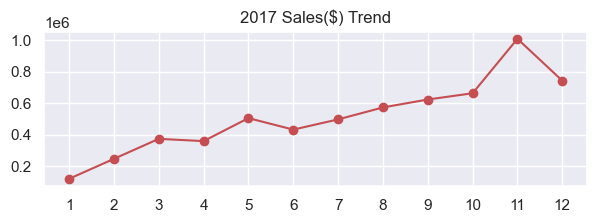

In [14]:
x_values = sales.index.to_list()
y_values = sales['Total_Sales'].values
fig, ax = plt.subplots(figsize=(7, 2))
ax.plot(x_values, y_values, marker='o', linestyle='-', color='r')
ax.set_xticks(range(1, 13))
ax.set(title="2017 Sales($) Trend")
plt.show()

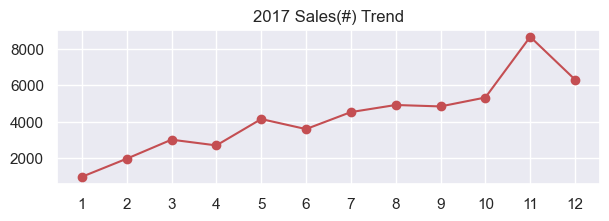

In [15]:
x_values = sales.index.to_list()
y_values = sales['Total_Qty'].values
fig, ax = plt.subplots(figsize=(7, 2))
ax.plot(x_values, y_values, marker='o', linestyle='-', color='r')
ax.set_xticks(range(1, 13))
ax.set(title="2017 Sales(#) Trend")
plt.show()

#### 2.3.1.2 Daily Sales Trend

In [16]:
orders17['order_purchase_timestamp'] = pd.to_datetime(orders17['order_purchase_timestamp'])
orders17['order_purchase_timestamp'] = orders17['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

In [18]:
total_sales_day = orders17.groupby(by = "order_purchase_timestamp")["product_sales_amt"].sum()
total_qty_day = orders17.groupby(by='order_purchase_timestamp')["product_order_size"].sum()
revenue_per_item_day = (orders17.groupby(by='order_purchase_timestamp')["product_sales_amt"].sum()/ orders17.groupby(by='order_purchase_timestamp')["product_order_size"].sum()).round(2)
order_size_day = (orders17.groupby(by='order_purchase_timestamp')["product_order_size"].sum()/orders17.groupby(by='order_purchase_timestamp')["order_id"].nunique()).round(2)

sales_day = pd.DataFrame(
    {'Total_Sales': total_sales_day,
     'Total_Qty': total_qty_day,
     'Revenue_per_Item': revenue_per_item_day,
     'Order_Size': order_size_day}).reset_index()
sales_day

order_purchase_timestamp  Total_Sales  Total_Qty  Revenue_per_Item  \
0                 2017-01-05       396.90       32.0             12.40   
1                 2017-01-06       916.38        4.0            229.10   
2                 2017-01-07      1351.90        5.0            270.38   
3                 2017-01-08       709.58        6.0            118.26   
4                 2017-01-09       673.79        6.0            112.30   
..                       ...          ...        ...               ...   
356               2017-12-27     17700.40      184.0             96.20   
357               2017-12-28     15037.49      157.0             95.78   
358               2017-12-29     16042.72      151.0            106.24   
359               2017-12-30     13042.65      108.0            120.77   
360               2017-12-31      8685.77       78.0            111.36   

     Order_Size  
0          1.00  
1          1.00  
2          1.25  
3          1.00  
4          1.20  
..          ...  
356        1.11  
357        1.08  
358        1.14  
359        1.12  
360        1.05  

[361 rows x 5 columns]

In [19]:
sales_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  361 non-null    object 
 1   Total_Sales               361 non-null    float64
 2   Total_Qty                 361 non-null    float64
 3   Revenue_per_Item          361 non-null    float64
 4   Order_Size                361 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.2+ KB


In [21]:
sales_day['order_purchase_timestamp'] = pd.to_datetime(sales_day['order_purchase_timestamp'])

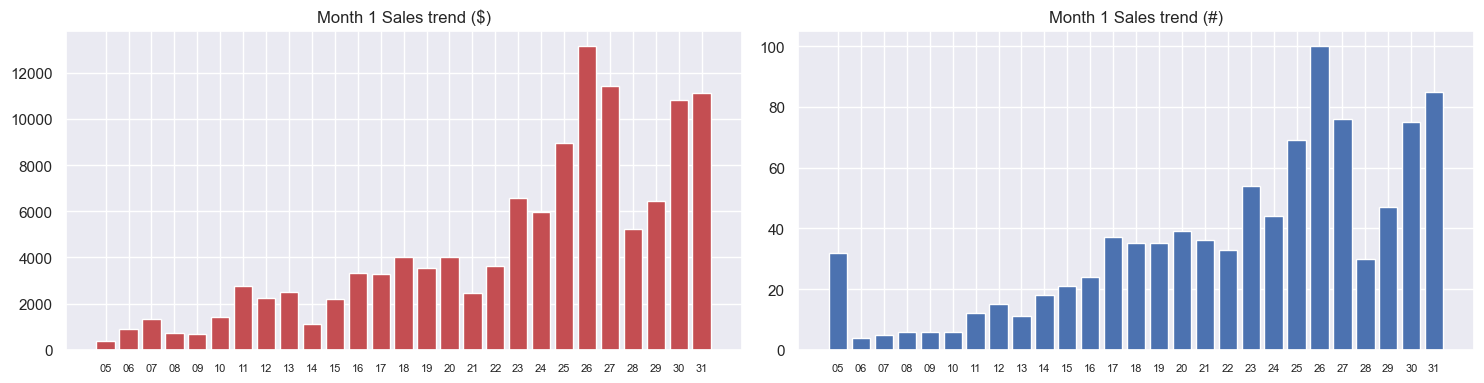

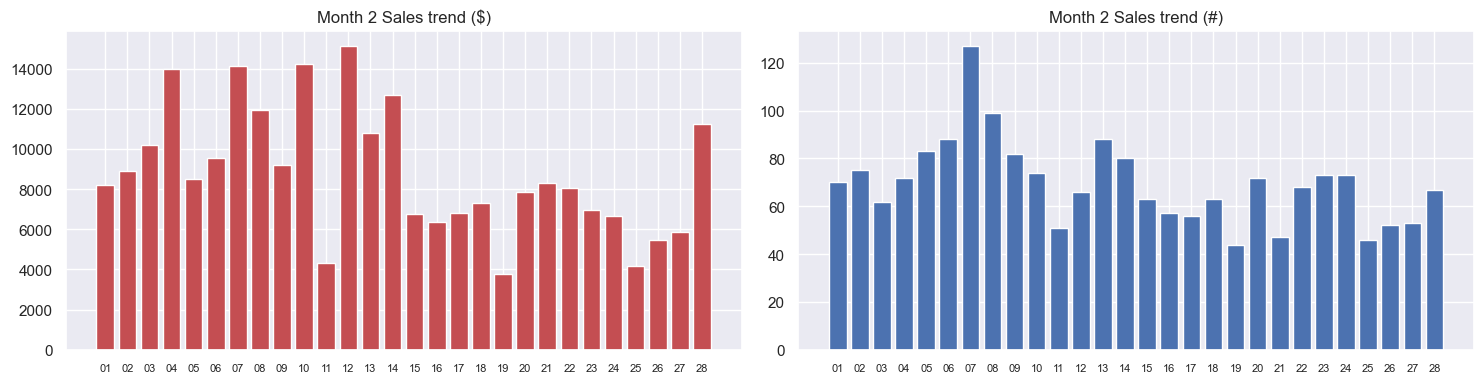

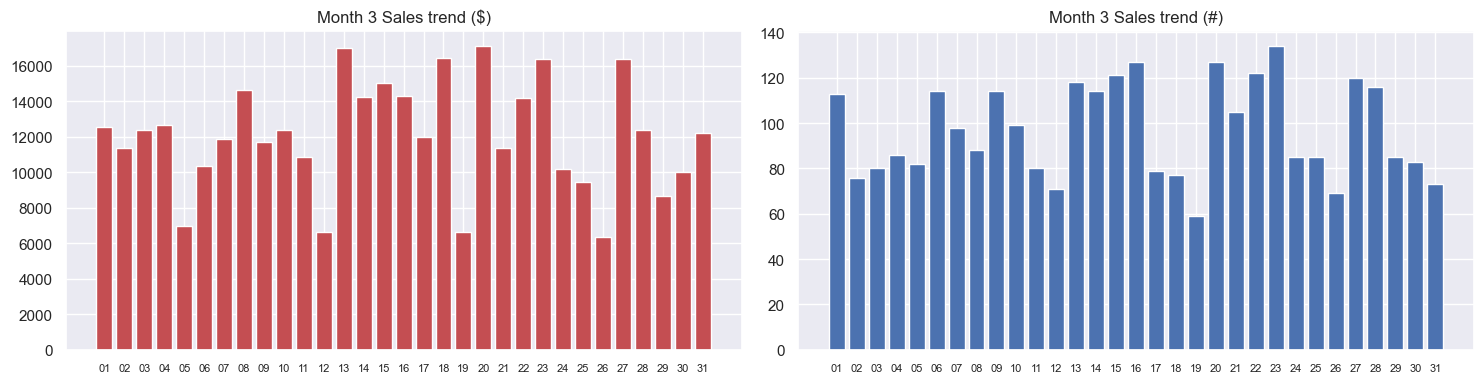

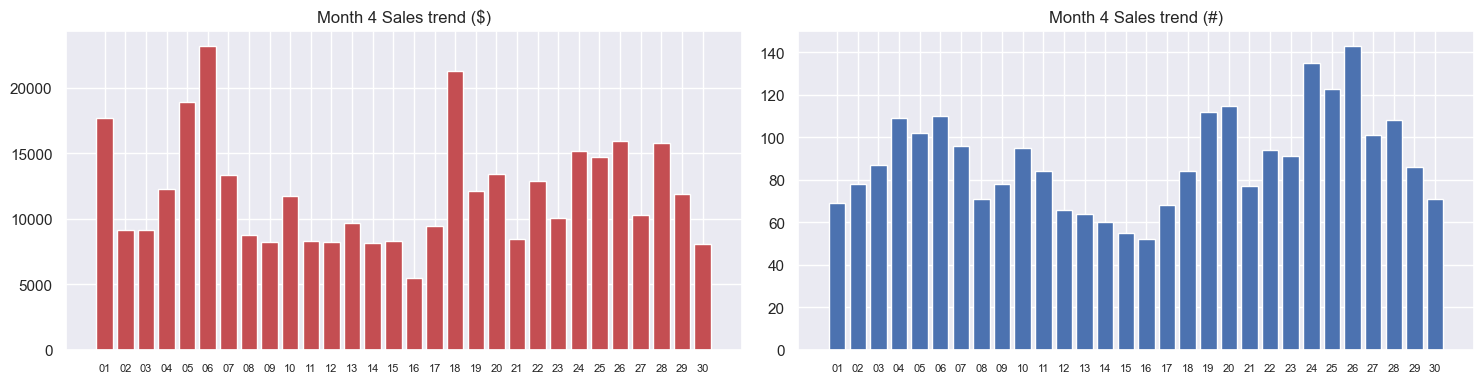

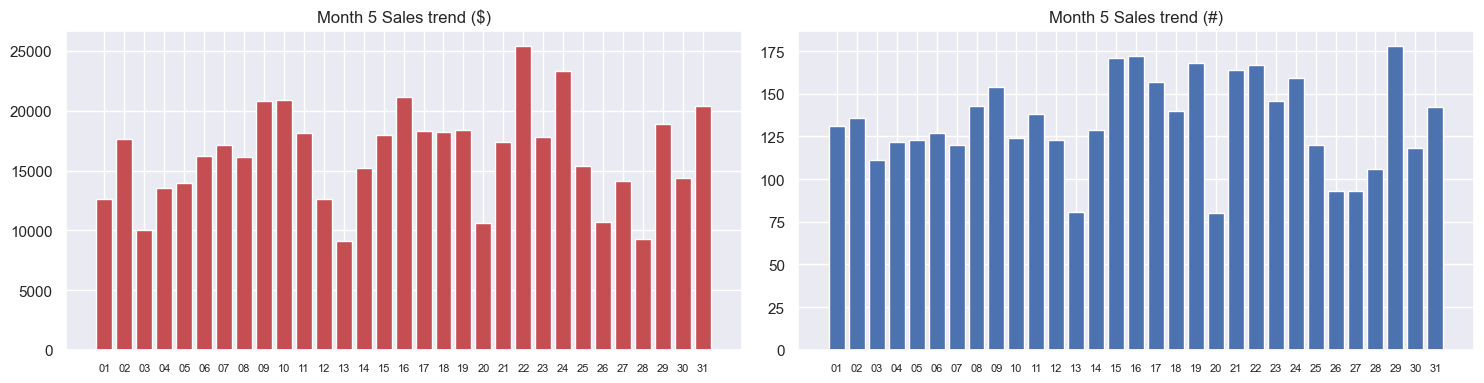

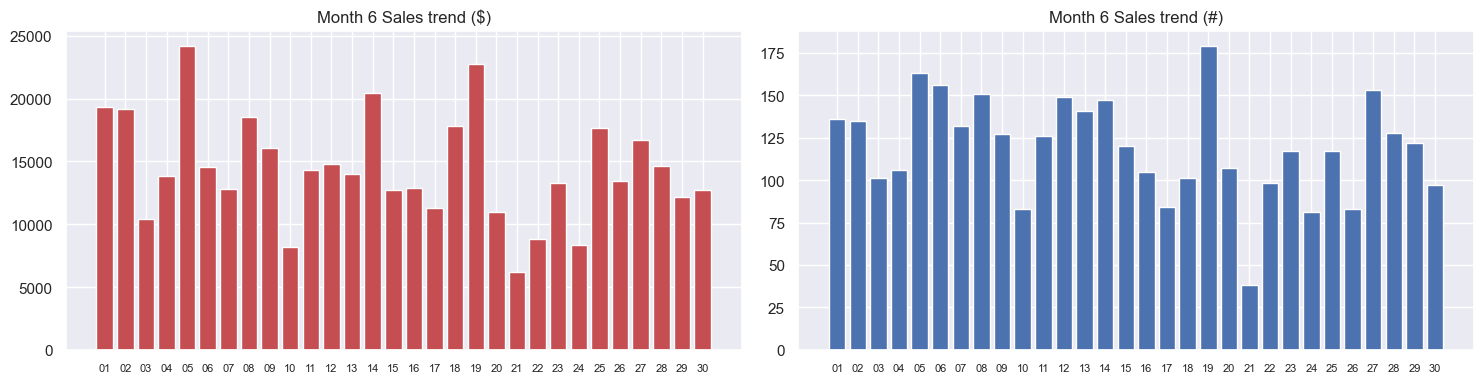

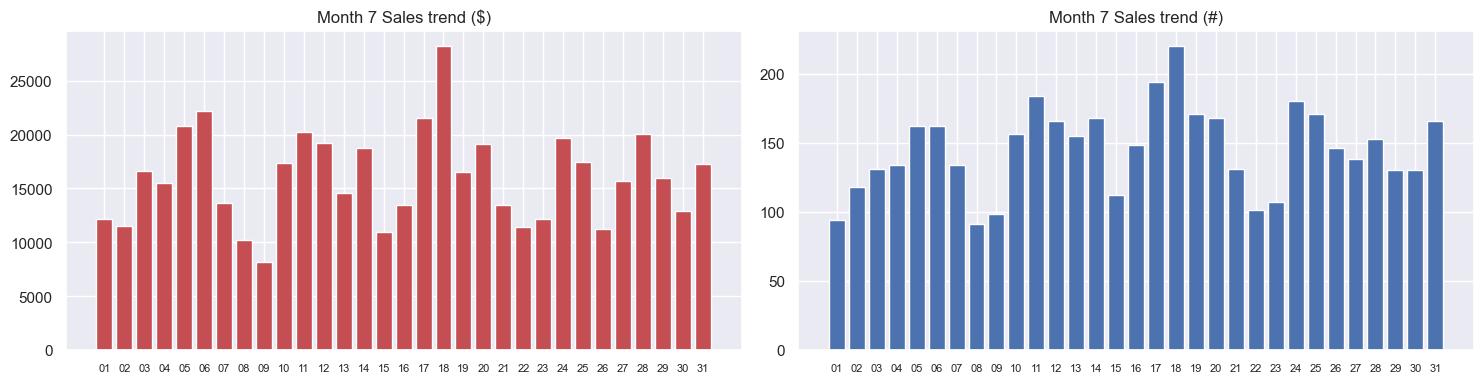

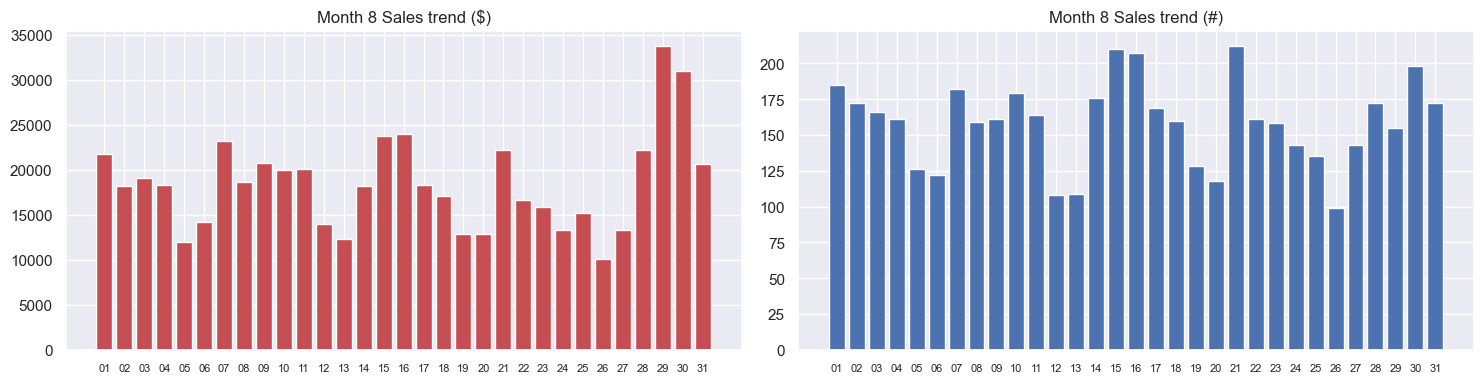

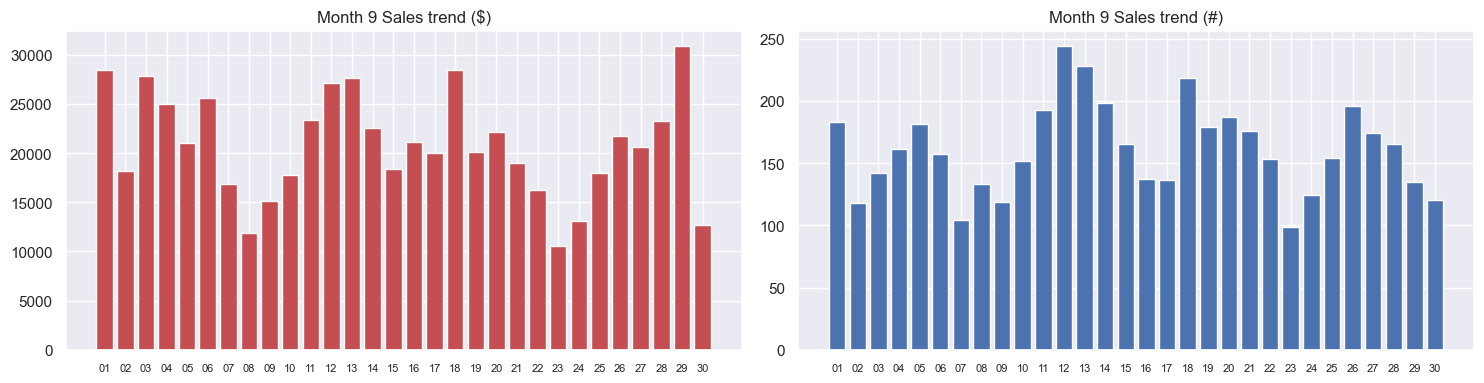

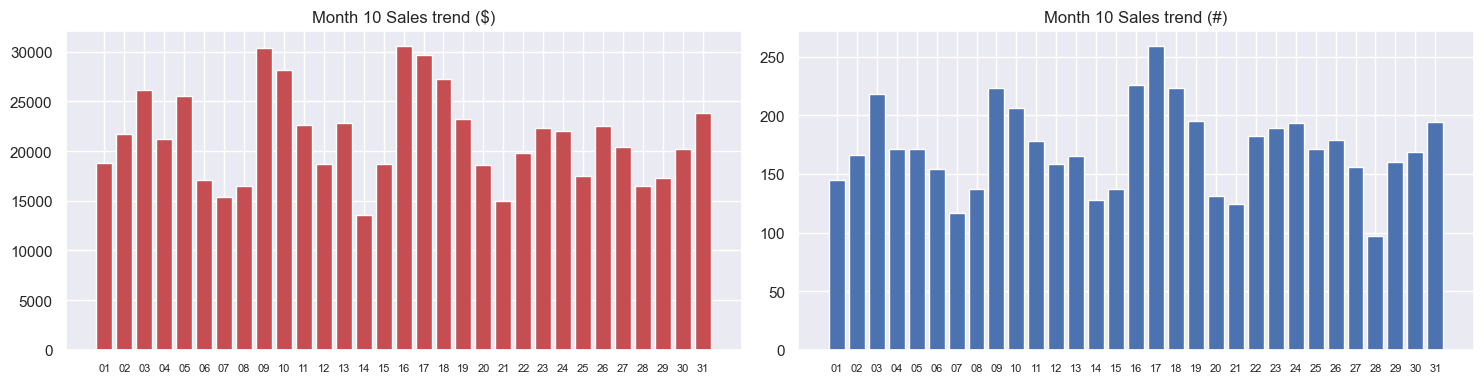

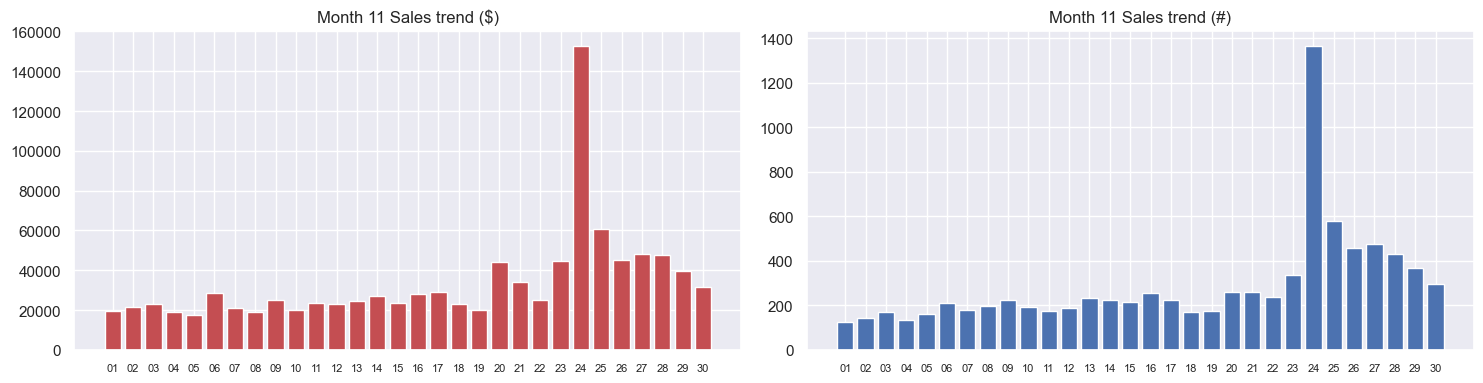

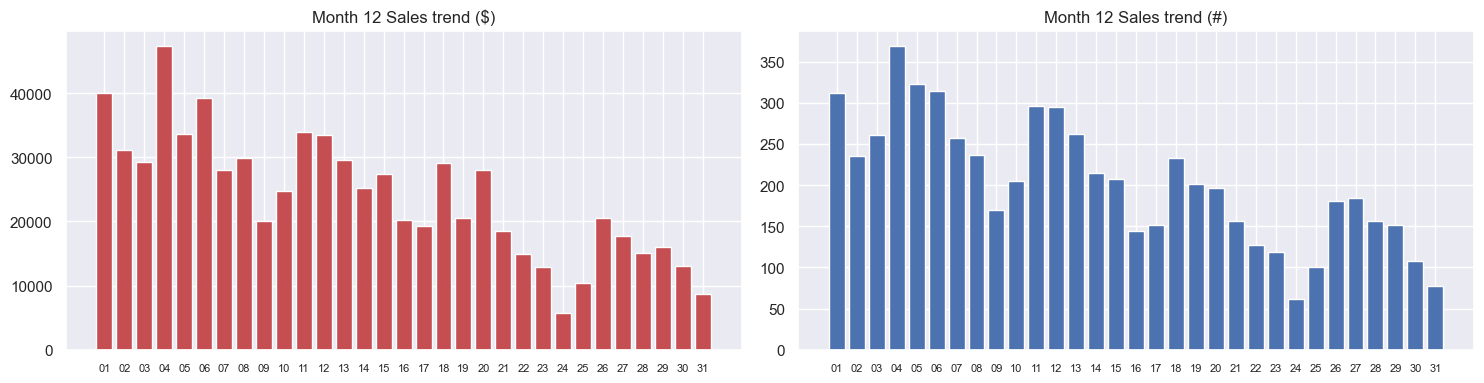

In [22]:
# Plot graphs that show the amount and quantity of daily sales, with the data for each month displayed in its own subplot.

for i in range(1, 13):
    filtered_data = sales_day[sales_day['order_purchase_timestamp'].dt.month == i]
    date_strings = [date.strftime('%d') for date in filtered_data['order_purchase_timestamp']]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  
    
    # First subplot - Total Sales
    y_values_sales = filtered_data['Total_Sales'].values
    ax1.bar(date_strings, y_values_sales, color='r')
    ax1.set_xticks(range(len(date_strings)))
    ax1.set_xticklabels(date_strings, size=8)
    ax1.set(title=f"Month {i} Sales trend ($)")

    # Second subplot - Total Quantity
    y_values_qty = filtered_data['Total_Qty'].values
    ax2.bar(date_strings, y_values_qty, color='b')
    ax2.set_xticks(range(len(date_strings)))
    ax2.set_xticklabels(date_strings, size=8)
    ax2.set(title=f"Month {i} Sales trend (#)")
    
    plt.tight_layout()
    plt.show()

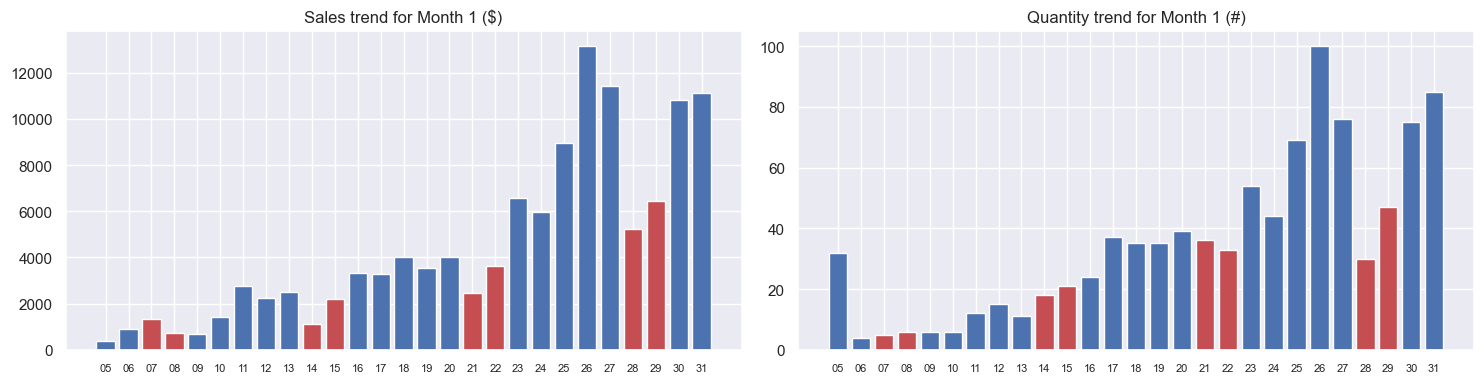

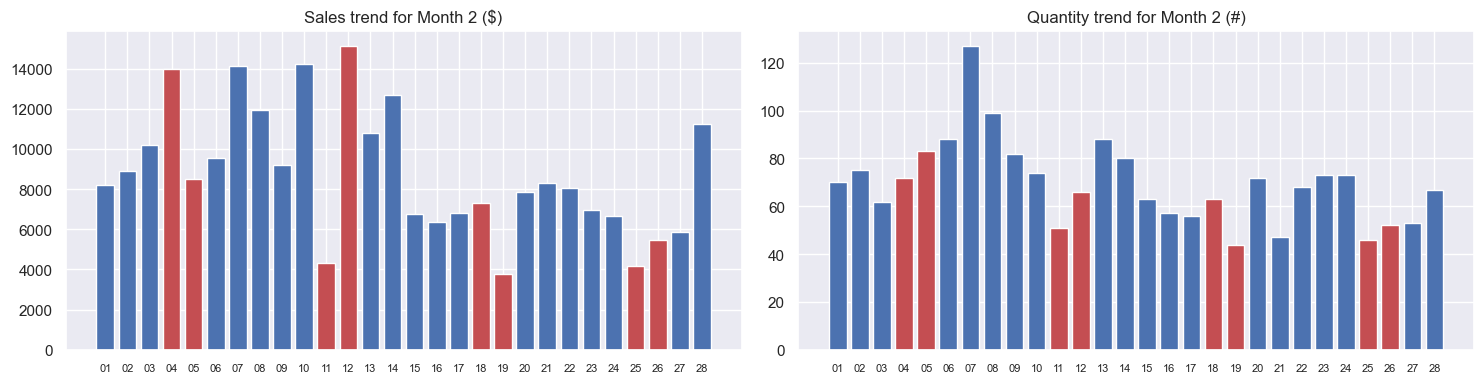

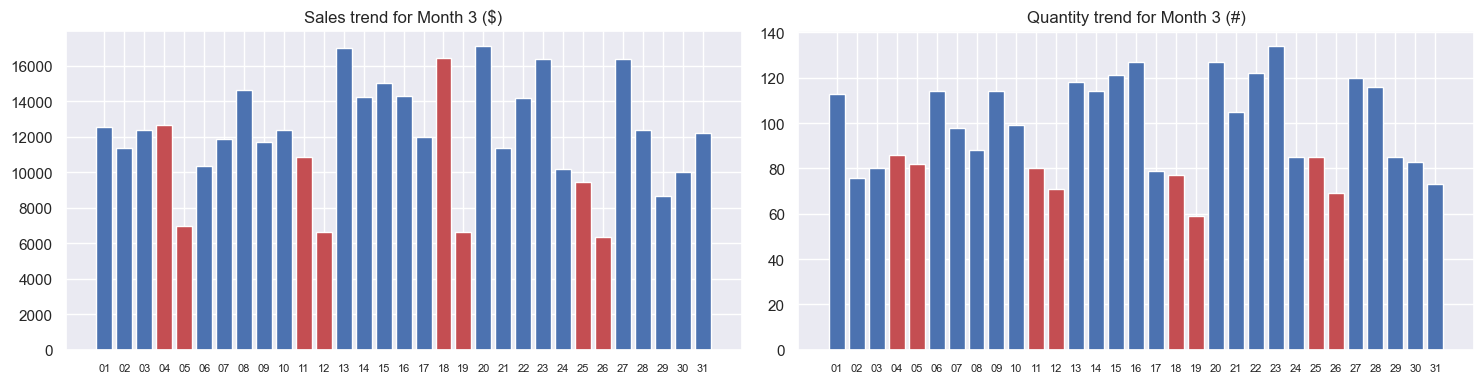

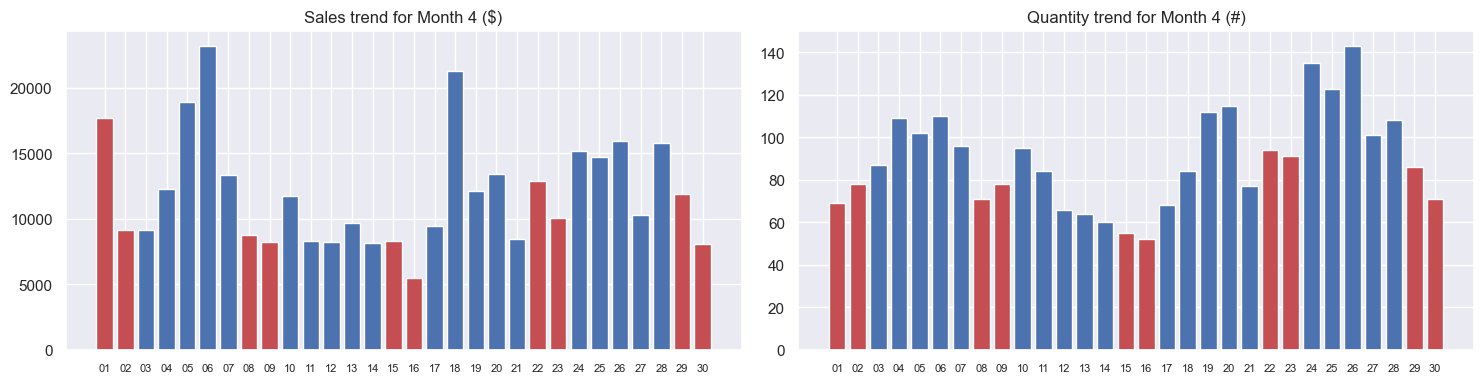

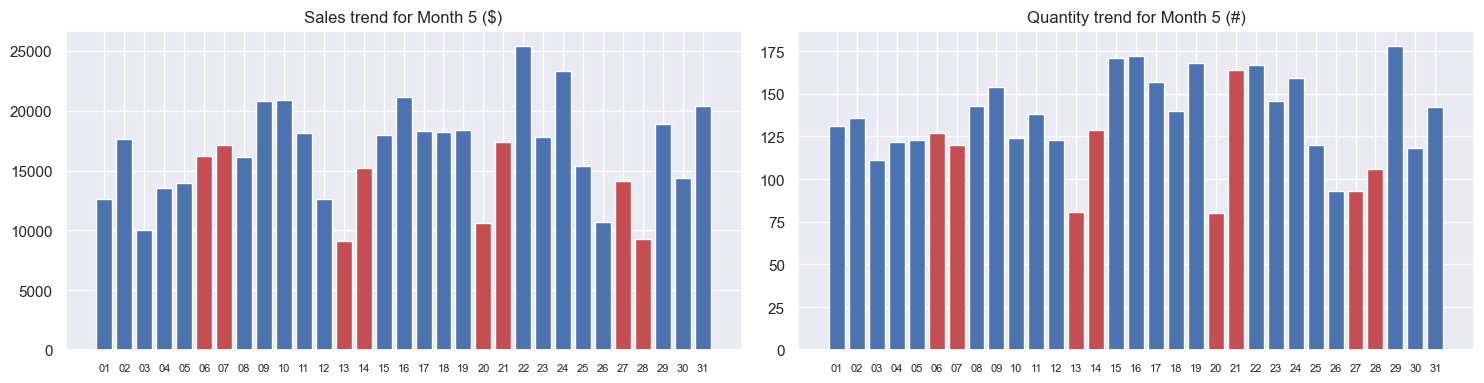

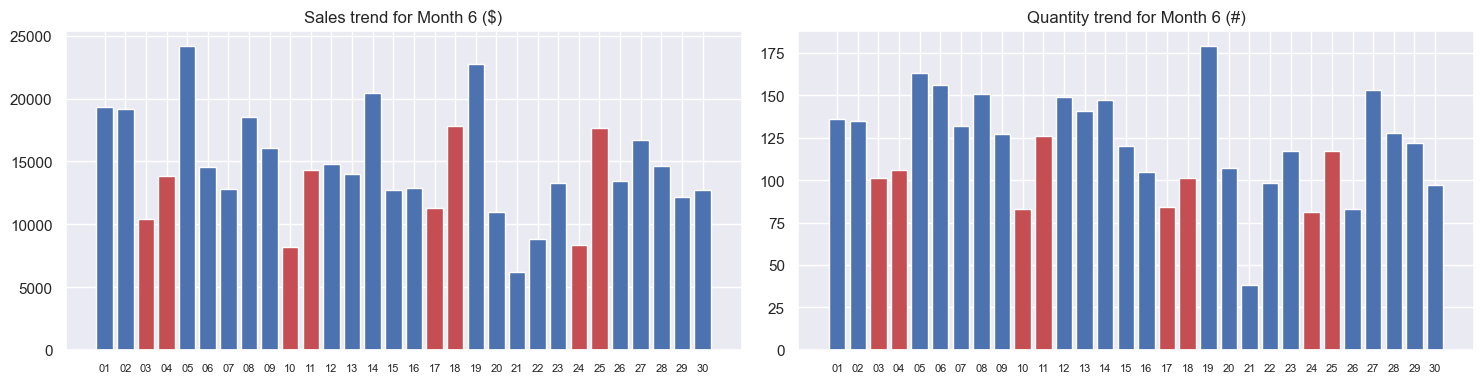

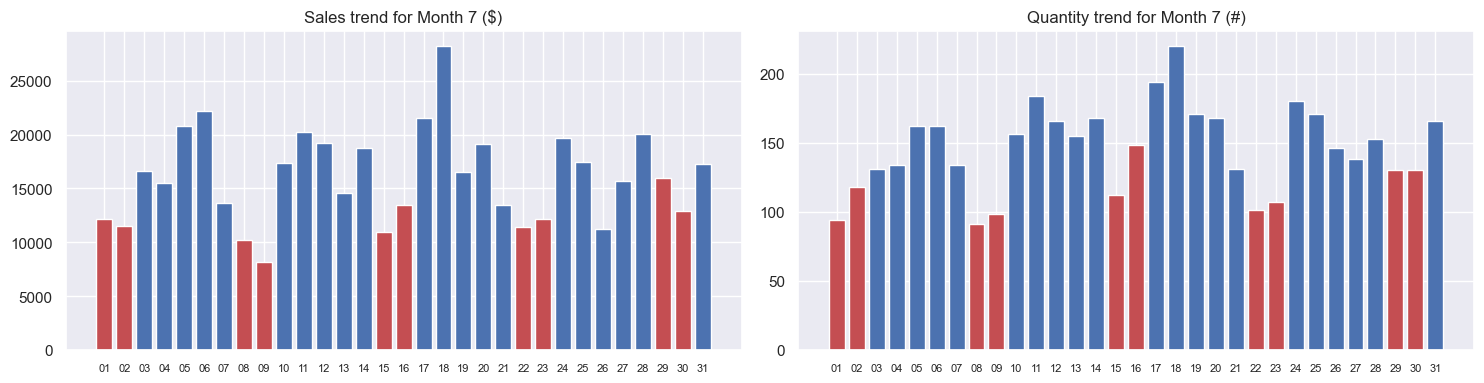

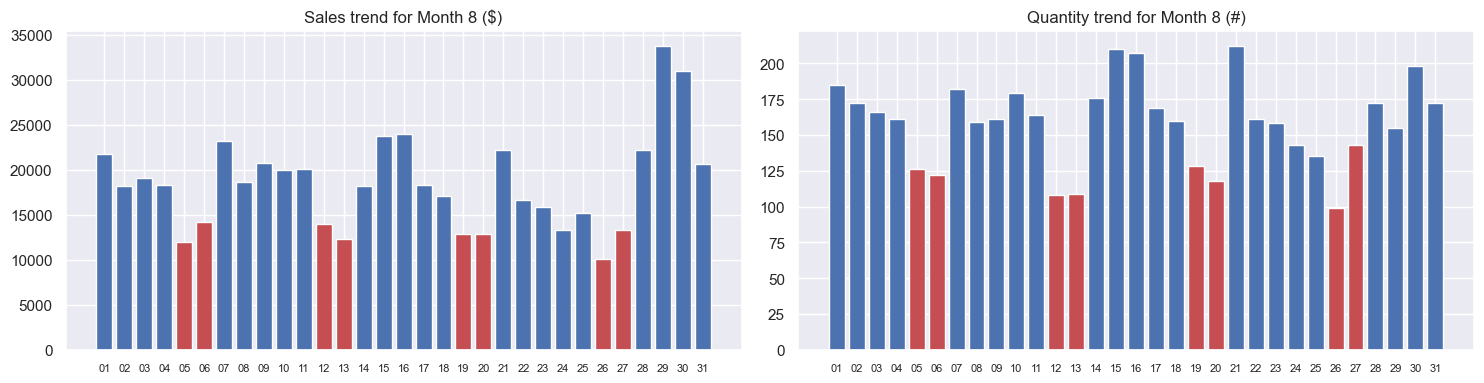

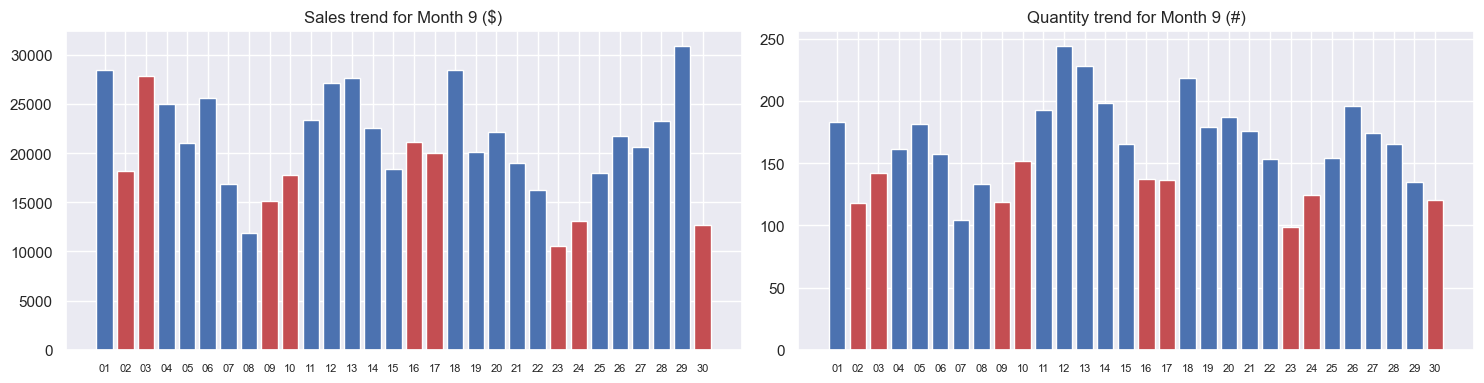

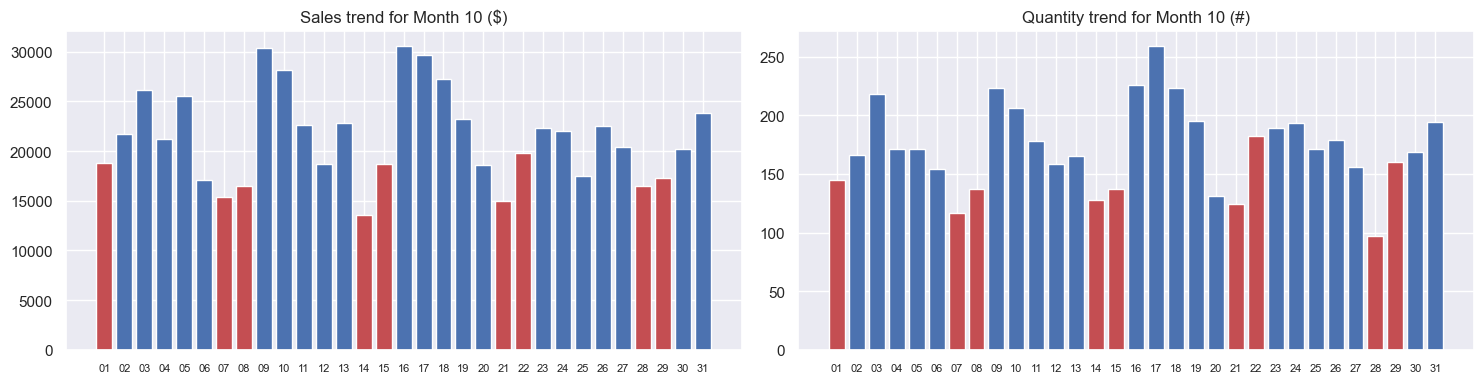

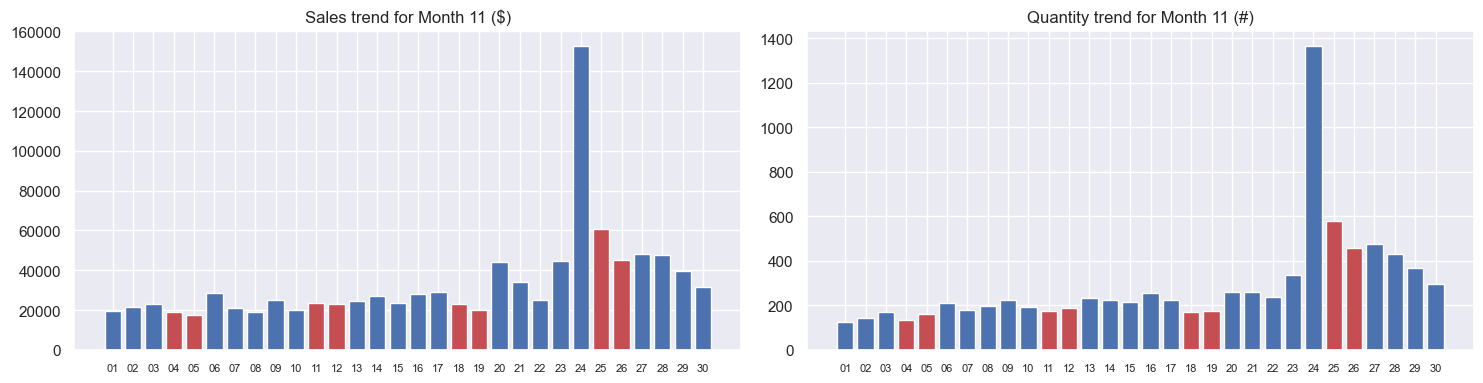

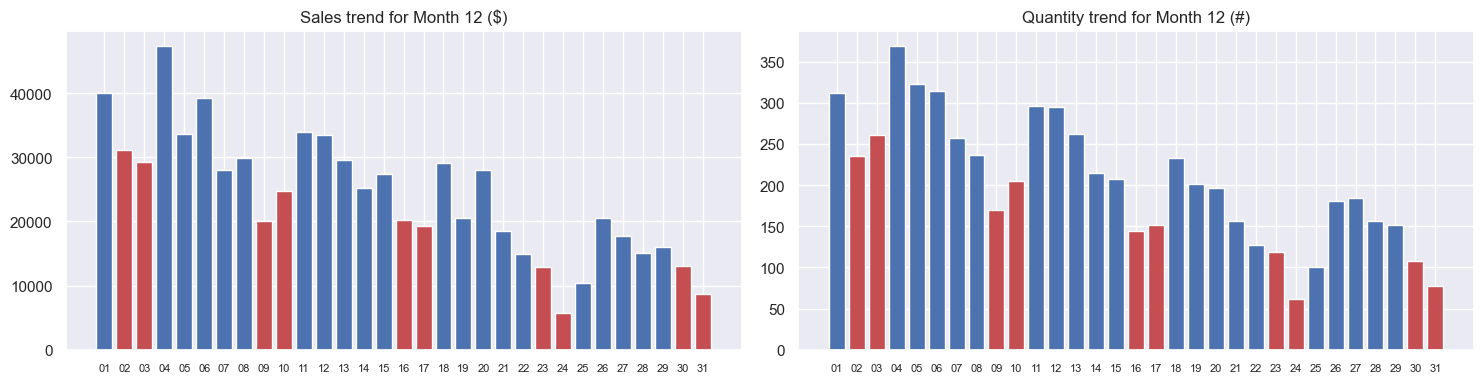

In [23]:
# Highlight the sales amount and quantity for the weekend in red.

for i in range(1, 13):
    filtered_data = sales_day[sales_day['order_purchase_timestamp'].dt.month == i]
    date_strings = [date.strftime('%d') for date in filtered_data['order_purchase_timestamp']]
    
    # Extracting date strings for plotting
    date_strings = [date.strftime('%d') for date in filtered_data['order_purchase_timestamp']]
    
    # Define colors for weekend and weekday data
    colors = ['b' if day.weekday() < 5 else 'r' for day in filtered_data['order_purchase_timestamp']]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  # Create subplots with 1 row and 2 columns
    
    # First subplot - Sales trend
    ax1.bar(date_strings, filtered_data['Total_Sales'].values, color=colors)
    ax1.set_xticks(range(len(date_strings)))
    ax1.set_xticklabels(date_strings, size=8)
    ax1.set(title=f"Sales trend for Month {i} ($)")
    
    # Second subplot - Quantity trend
    ax2.bar(date_strings, filtered_data['Total_Qty'].values, color=colors)
    ax2.set_xticks(range(len(date_strings)))
    ax2.set_xticklabels(date_strings, size=8)
    ax2.set(title=f"Quantity trend for Month {i} (#)")
    
    plt.tight_layout()
    plt.show()

In [34]:
monday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 0]['Total_Sales']
tuesday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 1]['Total_Sales']
wednesday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 2]['Total_Sales']
thursday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 3]['Total_Sales']
friday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 4]['Total_Sales']
saturday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 5]['Total_Sales']
sunday_sales = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 6]['Total_Sales']

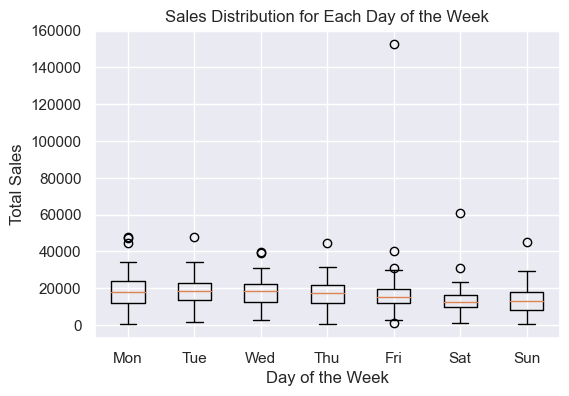

In [35]:
sales_data = [
    monday_sales, tuesday_sales, wednesday_sales,
    thursday_sales, friday_sales, saturday_sales, sunday_sales
]

# Plotting the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(sales_data)
plt.title('Sales Distribution for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

In [32]:
monday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 0]['Total_Qty']
tuesday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 1]['Total_Qty']
wednesday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 2]['Total_Qty']
thursday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 3]['Total_Qty']
friday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 4]['Total_Qty']
saturday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 5]['Total_Qty']
sunday_sales_Q = sales_day[sales_day['order_purchase_timestamp'].dt.weekday == 6]['Total_Qty']

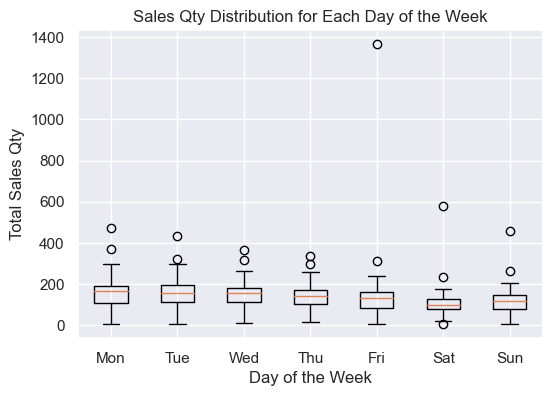

In [36]:
sales_Q_data = [
    monday_sales_Q, tuesday_sales_Q, wednesday_sales_Q,
    thursday_sales_Q, friday_sales_Q, saturday_sales_Q, sunday_sales_Q
]

# Plotting the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(sales_Q_data)
plt.title('Sales Qty Distribution for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Qty')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

In [38]:
sales_day.describe().T

count          mean           std    min       25%  \
Total_Sales       361.0  17052.096898  11214.988430  396.9  11220.76   
Total_Qty         361.0    140.897507     97.068206    4.0     88.00   
Revenue_per_Item  361.0    123.967978     29.407356   12.4    107.46   
Order_Size        361.0      1.138476      0.066967    1.0      1.10   

                       50%       75%        max  
Total_Sales       15919.75  20829.71  152653.74  
Total_Qty           131.00    171.00    1366.00  
Revenue_per_Item    117.54    133.01     270.38  
Order_Size            1.13      1.17       1.50

#### 2.3.1.3 Sales trend by product category

In [39]:
## Sales($)

product = pd.DataFrame(orders17.groupby(by=['Month',"product_category_name_english"])['product_sales_amt'].sum().round(3))
product = product.reset_index()
product = product.pivot(index = 'product_category_name_english', columns = 'Month', values = 'product_sales_amt')
product['Total'] = product.sum(axis=1)
product.sort_values(by="Total", ascending=False)

Month                                 1         2         3         4  \
product_category_name_english                                           
bed_bath_table                  3960.16  16282.73  25773.02  24347.69   
watches_gifts                   8086.52  11756.21  26770.38  23487.78   
health_beauty                  12561.32  22838.79  25995.25  22935.75   
sports_leisure                  9717.62  16372.16  27001.59  24864.33   
computers_accessories           3924.14  11972.59  28624.60  20691.06   
...                                 ...       ...       ...       ...   
fashion_childrens_clothes           NaN       NaN       NaN       NaN   
security_and_services            183.29       NaN       NaN       NaN   
flowers                             NaN       NaN       NaN       NaN   
arts_and_craftmanship               NaN       NaN       NaN       NaN   
diapers_and_hygiene                 NaN       NaN       NaN       NaN   

Month                                 5         6         7         8  \
product_category_name_english                                           
bed_bath_table                 33346.45  35114.81  63888.75  57137.23   
watches_gifts                  37973.90  28948.63  36804.56  36419.20   
health_beauty                  46786.02  32029.39  34896.86  49873.90   
sports_leisure                 36163.50  32898.33  38813.41  41732.26   
computers_accessories          45634.78  37007.08  38709.00  35025.72   
...                                 ...       ...       ...       ...   
fashion_childrens_clothes        110.00    110.00       NaN     49.90   
security_and_services               NaN       NaN       NaN       NaN   
flowers                             NaN       NaN       NaN       NaN   
arts_and_craftmanship             21.99       NaN    129.90       NaN   
diapers_and_hygiene                 NaN       NaN       NaN       NaN   

Month                                 9        10        11        12  \
product_category_name_english                                           
bed_bath_table                 52473.20  46198.00  89412.54  50505.85   
watches_gifts                  47135.60  65959.53  97724.57  71727.62   
health_beauty                  51537.65  41915.72  79120.40  61264.66   
sports_leisure                 50167.48  49751.45  64874.05  59792.66   
computers_accessories          28930.98  44022.09  72656.00  37880.65   
...                                 ...       ...       ...       ...   
fashion_childrens_clothes         89.99     39.99       NaN       NaN   
security_and_services            100.00       NaN       NaN       NaN   
flowers                             NaN       NaN    187.80     82.70   
arts_and_craftmanship               NaN       NaN       NaN       NaN   
diapers_and_hygiene                 NaN       NaN       NaN     76.00   

Month                              Total  
product_category_name_english             
bed_bath_table                 498440.43  
watches_gifts                  492794.50  
health_beauty                  481755.71  
sports_leisure                 452148.84  
computers_accessories          405078.69  
...                                  ...  
fashion_childrens_clothes         399.88  
security_and_services             283.29  
flowers                           270.50  
arts_and_craftmanship             151.89  
diapers_and_hygiene                76.00  

[72 rows x 13 columns]

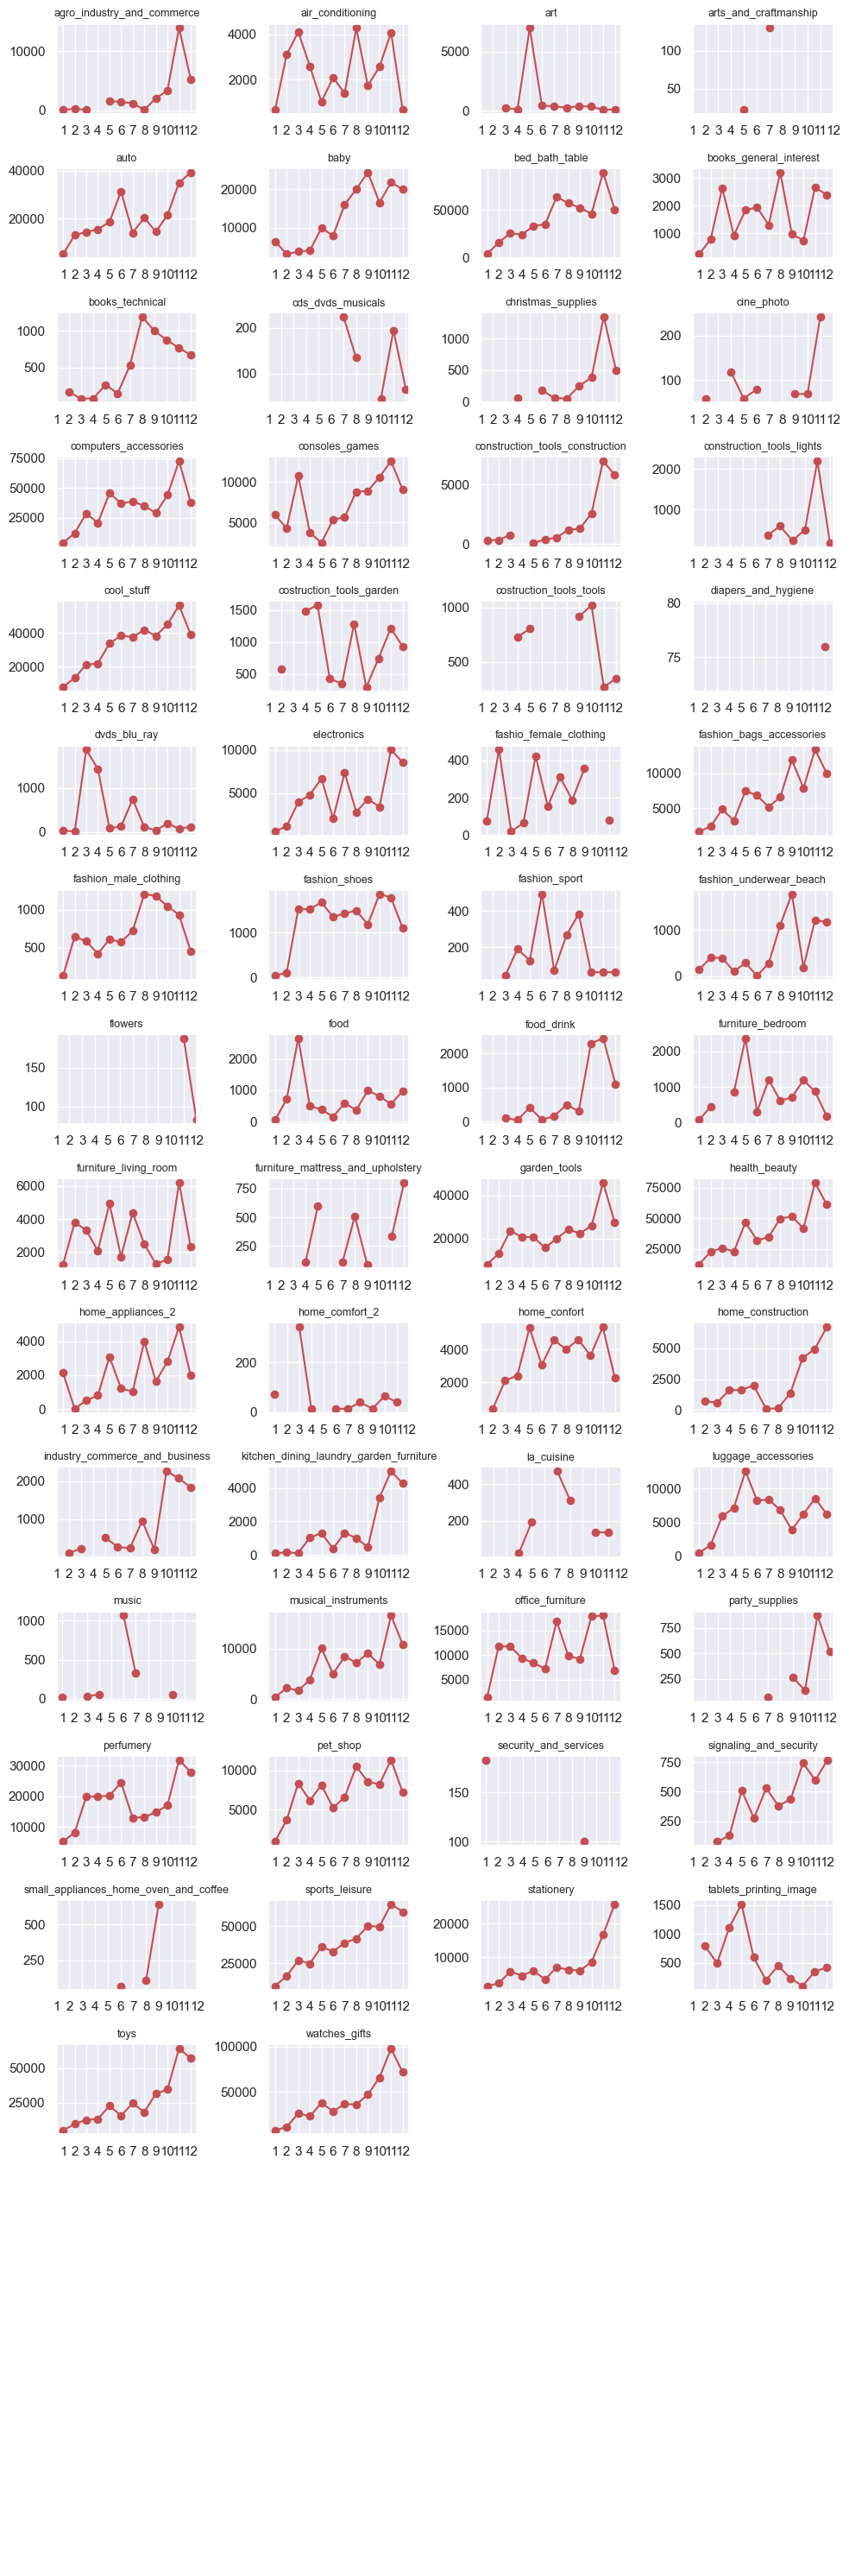

In [40]:
fig, axes = plt.subplots(18, 4, figsize=(10, 2 * 15))  # Creating a grid with 15 rows and 5 columns

for i in range(18):  
    for j in range(4):  
        idx = i * 5 + j 
        
        if idx < len(product):  # Check if within the range of available data
            x_values = product.columns.drop(['Total'])
            y_values = product.iloc[idx, :].drop(['Total'])

            axes[i, j].plot(x_values, y_values, marker='o', linestyle='-', color='r')
            axes[i, j].set_title(product.index[idx], fontsize=9)  # Adjust fontsize for title
            axes[i, j].grid(True)
            axes[i, j].set_xticks(range(1, len(x_values) + 1), fontsize = 8)  # Setting x-tick positions
            axes[i, j].set_xticklabels(x_values)  # Setting x-tick labels with rotation
        else:
            axes[i, j].axis('off')  # Turn off empty subplots if there's no data

plt.tight_layout()
plt.show()

In [42]:
# Order qty(#)

product = pd.DataFrame(orders17.groupby(by=['Month',"product_category_name_english"])['product_order_size'].sum().round(3))
product = product.reset_index()
product = product.pivot(index = 'product_category_name_english', columns = 'Month', values = 'product_order_size')
product['Total'] = product.sum(axis=1)
product.sort_values(by="Total", ascending=False)

Month                                      1      2      3      4      5  \
product_category_name_english                                              
bed_bath_table                          48.0  165.0  289.0  274.0  369.0   
furniture_decor                        182.0  266.0  328.0  203.0  279.0   
sports_leisure                          80.0  156.0  199.0  218.0  316.0   
health_beauty                           85.0  166.0  211.0  189.0  290.0   
computers_accessories                   31.0  106.0  174.0  136.0  320.0   
...                                      ...    ...    ...    ...    ...   
small_appliances_home_oven_and_coffee    NaN    NaN    NaN    NaN    NaN   
pc_gamer                                 NaN    NaN    NaN    2.0    1.0   
security_and_services                    1.0    NaN    NaN    NaN    NaN   
arts_and_craftmanship                    NaN    NaN    NaN    NaN    1.0   
diapers_and_hygiene                      NaN    NaN    NaN    NaN    NaN   

Month                                      6      7      8      9     10  \
product_category_name_english                                              
bed_bath_table                         382.0  579.0  512.0  533.0  545.0   
furniture_decor                        233.0  320.0  436.0  348.0  379.0   
sports_leisure                         277.0  387.0  425.0  461.0  471.0   
health_beauty                          260.0  316.0  360.0  380.0  361.0   
computers_accessories                  261.0  326.0  350.0  253.0  322.0   
...                                      ...    ...    ...    ...    ...   
small_appliances_home_oven_and_coffee    1.0    NaN    2.0    1.0    NaN   
pc_gamer                                 1.0    NaN    NaN    NaN    NaN   
security_and_services                    NaN    NaN    NaN    1.0    NaN   
arts_and_craftmanship                    NaN    1.0    NaN    NaN    NaN   
diapers_and_hygiene                      NaN    NaN    NaN    NaN    NaN   

Month                                     11     12   Total  
product_category_name_english                                
bed_bath_table                         975.0  552.0  5223.0  
furniture_decor                        783.0  390.0  4147.0  
sports_leisure                         612.0  493.0  4095.0  
health_beauty                          584.0  466.0  3668.0  
computers_accessories                  532.0  287.0  3098.0  
...                                      ...    ...     ...  
small_appliances_home_oven_and_coffee    NaN    NaN     4.0  
pc_gamer                                 NaN    NaN     4.0  
security_and_services                    NaN    NaN     2.0  
arts_and_craftmanship                    NaN    NaN     2.0  
diapers_and_hygiene                      NaN    2.0     2.0  

[72 rows x 13 columns]

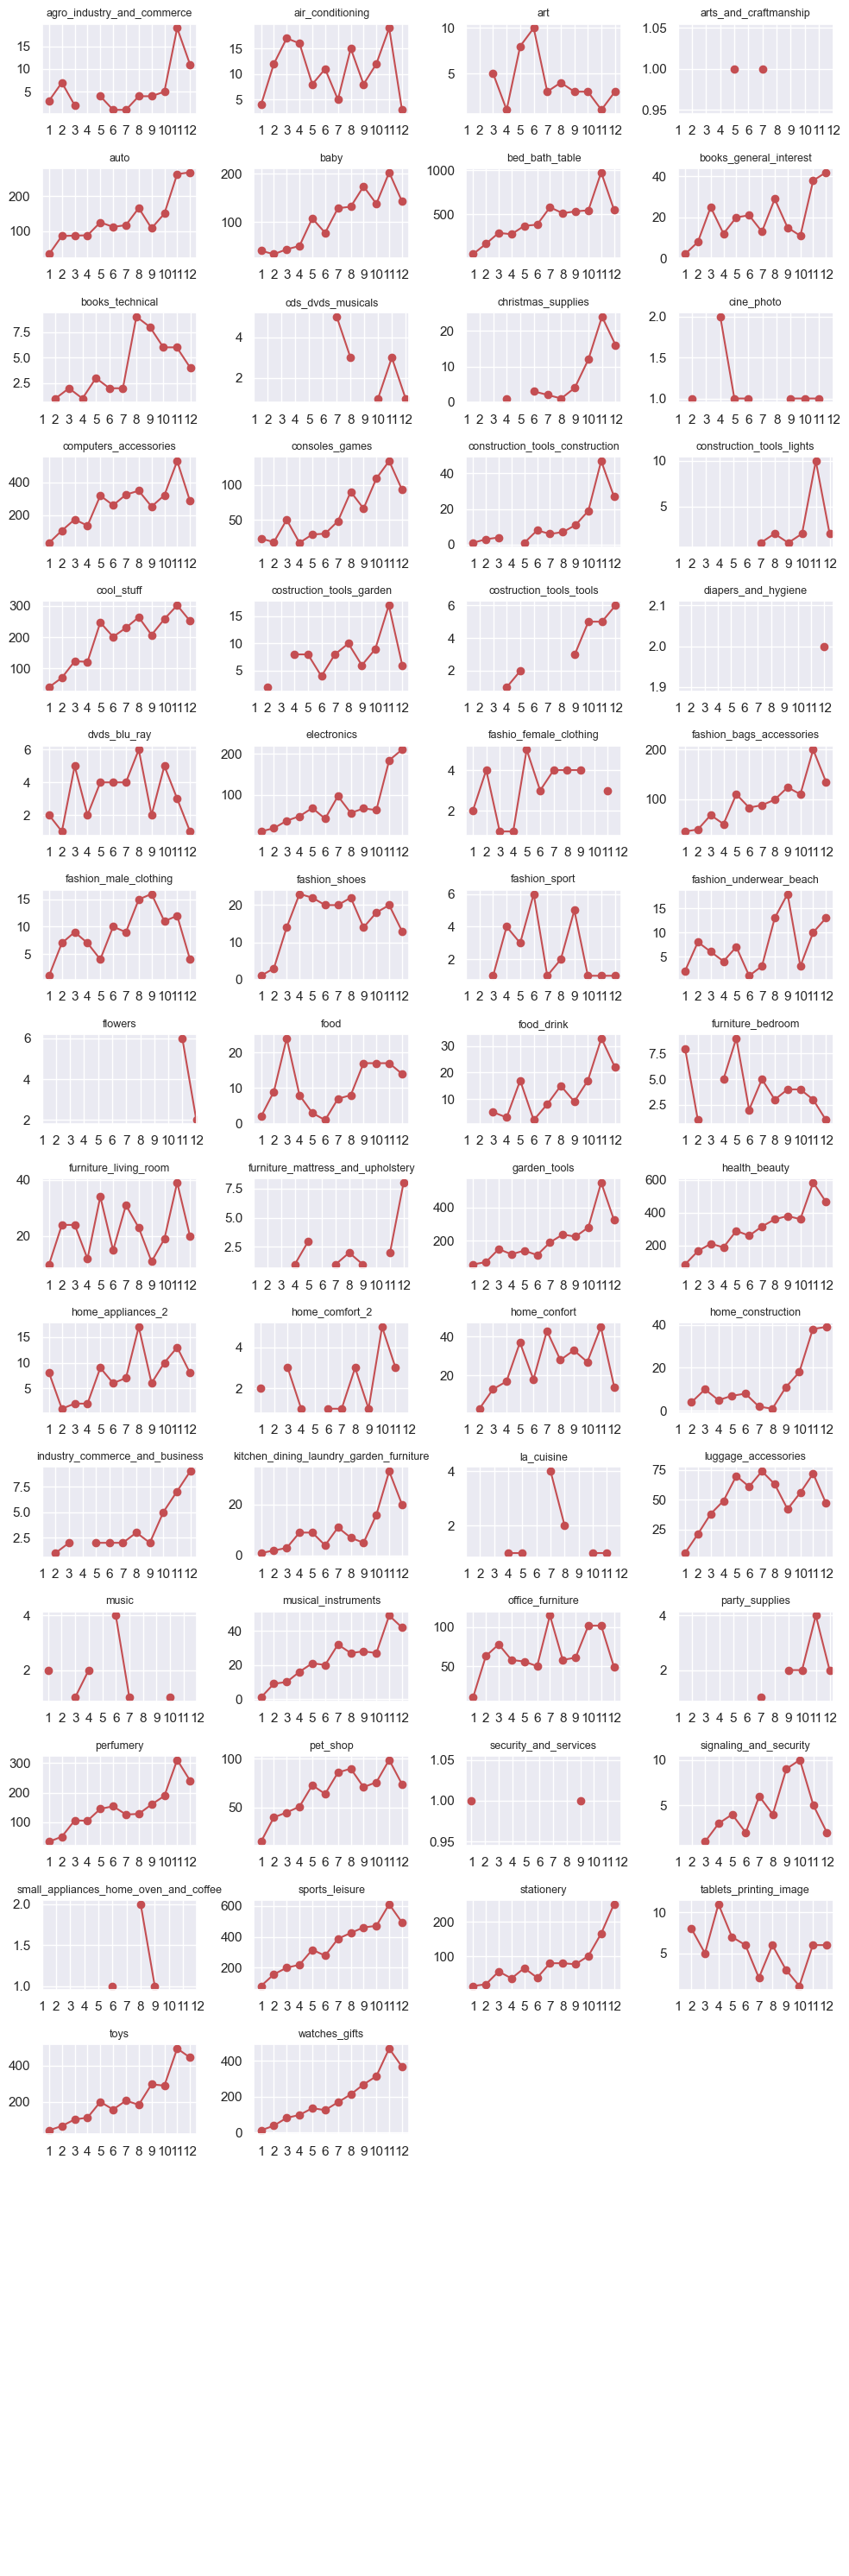

In [43]:
fig, axes = plt.subplots(18, 4, figsize=(10, 2 * 15))  # Creating a grid with 15 rows and 5 columns

for i in range(18):  
    for j in range(4):  
        idx = i * 5 + j 
        
        if idx < len(product):  # Check if within the range of available data
            x_values = product.columns.drop(['Total'])
            y_values = product.iloc[idx, :].drop(['Total'])

            axes[i, j].plot(x_values, y_values, marker='o', linestyle='-', color='r')
            axes[i, j].set_title(product.index[idx], fontsize=9)  # Adjust fontsize for title
            axes[i, j].grid(True)
            axes[i, j].set_xticks(range(1, len(x_values) + 1), fontsize = 8)  # Setting x-tick positions
            axes[i, j].set_xticklabels(x_values)  # Setting x-tick labels with rotation
        else:
            axes[i, j].axis('off')  # Turn off empty subplots if there's no data

plt.tight_layout()
plt.show()

#### 2.3.1.4 Product price chart

In [51]:
product17=orders17[['Month', 'product_category_name_english', 'product_id', 'price']].drop_duplicates()
product17

Month product_category_name_english                        product_id  \
0         10                    housewares  87285b34884572647811a353c7ac498a   
1         11                      pet_shop  d0b61bfb1de832b15ba9d266ca96e5b0   
2          7                          auto  060cb19345d90064d1015407193c233d   
3          4                           NaN  a1804276d9941ac0733cfd409f5206eb   
4          5                          auto  4520766ec412348b8d4caa5e8a18c464   
...      ...                           ...                               ...   
46308     10                          toys  c982dbea53b864f4d27c1d36f14b6053   
46309     10                          toys  49d2e2460386273b195e7e59b43587c3   
46311      2               furniture_decor  ea73128566d1b082e5101ce46f8107c7   
46312      3                 health_beauty  ac35486adb7b02598c182c2ff2e05254   
46313      8             home_appliances_2  b80910977a37536adeddd63663f916ad   

        price  
0       29.99  
1       45.00  
2      147.90  
3       49.90  
4       59.99  
...       ...  
46308   42.11  
46309   26.90  
46311  139.90  
46312   72.00  
46313  205.99  

[29761 rows x 4 columns]

In [52]:
product17.to_csv('price_chart', sep=',', index=False, encoding='utf-8')

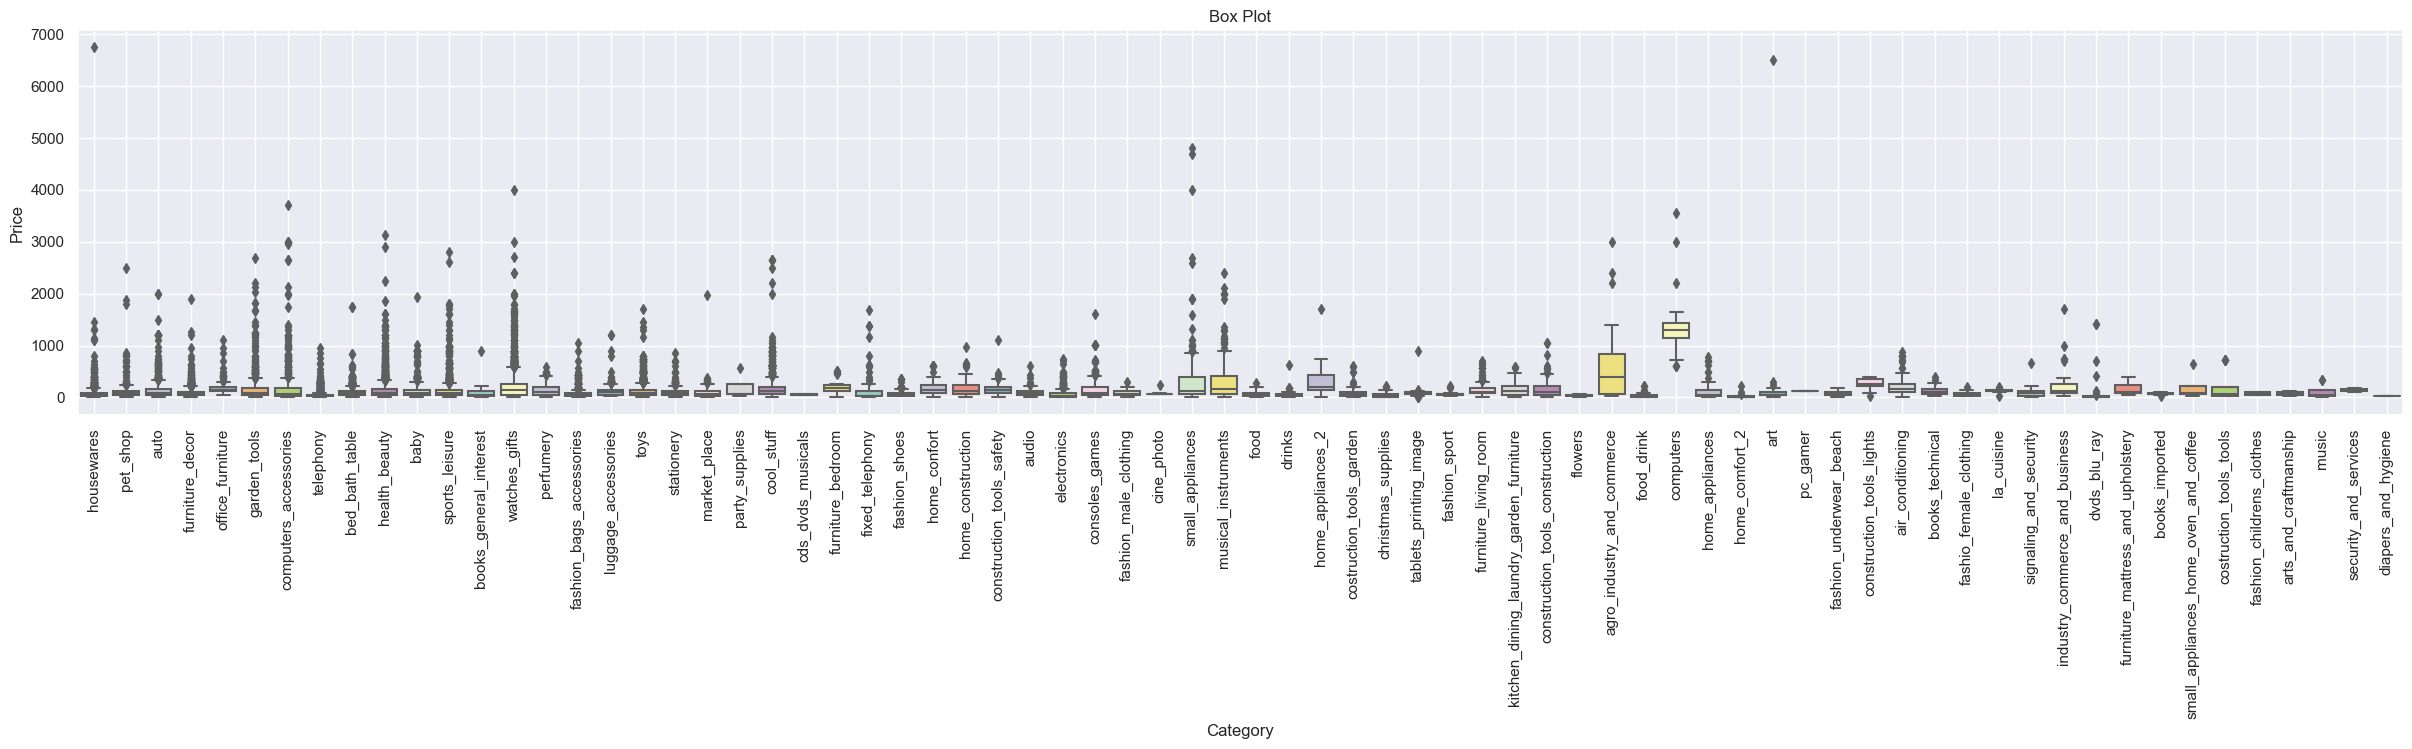

In [58]:
# Creating a box plot
plt.figure(figsize=(30, 5))
sns.boxplot(x='product_category_name_english', y='price', data=product17, palette="Set3")

plt.title('Box Plot')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [77]:
# Plot a line chart showing the average price of each product category

product_avg = pd.DataFrame(
    (product17.groupby(['Month', 'product_category_name_english'])['price'].sum())/
    (product17.groupby(['Month', 'product_category_name_english'])['product_id'].nunique())
).reset_index()

product_avg.columns = ['Month', 'product_category_name_english', 'Avg_Price']

product_avg_pivot = product_avg.pivot(index='Month', columns='product_category_name_english', values='Avg_Price')

product_avg_pivot

product_category_name_english  agro_industry_and_commerce  air_conditioning  \
Month                                                                         
1                                               21.990000        171.266667   
2                                               57.445000        255.580000   
3                                               40.995000        395.675714   
4                                                     NaN        273.704286   
5                                              506.650000        132.538571   
6                                             1390.000000        185.920000   
7                                             1180.000000        279.220000   
8                                               22.000000        232.027500   
9                                              531.996667        233.150000   
10                                             670.056000        223.022857   
11                                             935.427143        201.473571   
12                                             560.542857        222.933333   

product_category_name_english         art  arts_and_craftmanship       audio  \
Month                                                                          
1                                     NaN                    NaN         NaN   
2                                     NaN                    NaN   29.700000   
3                               48.812500                    NaN   91.112857   
4                              119.900000                    NaN   82.740000   
5                              985.392857                  21.99  134.853333   
6                               47.137500                    NaN  144.333333   
7                              128.916667                 129.90  123.631667   
8                               77.450000                    NaN  160.283333   
9                              129.513333                    NaN  108.073750   
10                             116.350000                    NaN  110.554444   
11                              75.000000                    NaN  123.005833   
12                              38.416667                    NaN  121.848000   

product_category_name_english        auto        baby  bed_bath_table  \
Month                                                                   
1                              138.521600  185.373333       86.282703   
2                              158.444423  105.773043      108.577664   
3                              195.642157   89.017105      103.934506   
4                              189.300000   86.674815      100.718600   
5                              145.253429   96.729167      100.123564   
6                              170.646034  115.540192       95.791787   
7                              118.697083  132.928902       97.143593   
8                              120.162788  183.563291      109.696370   
9                              129.587067  175.603077      103.916884   
10                             149.546903  131.510920       93.692665   
11                             136.085543  126.291810      101.891067   
12                             132.627791  138.902979       97.266905   

product_category_name_english  books_general_interest  books_imported  ...  \
Month                                                                  ...   
1                                          117.445000             NaN  ...   
2                                           93.958571       99.000000  ...   
3                                           91.341818             NaN  ...   
4                                           84.631111       19.990000  ...   
5                                           98.672500             NaN  ...   
6                                           84.386250       49.500000  ...   
7                                           93.509091             NaN  ...   
8                                          113.

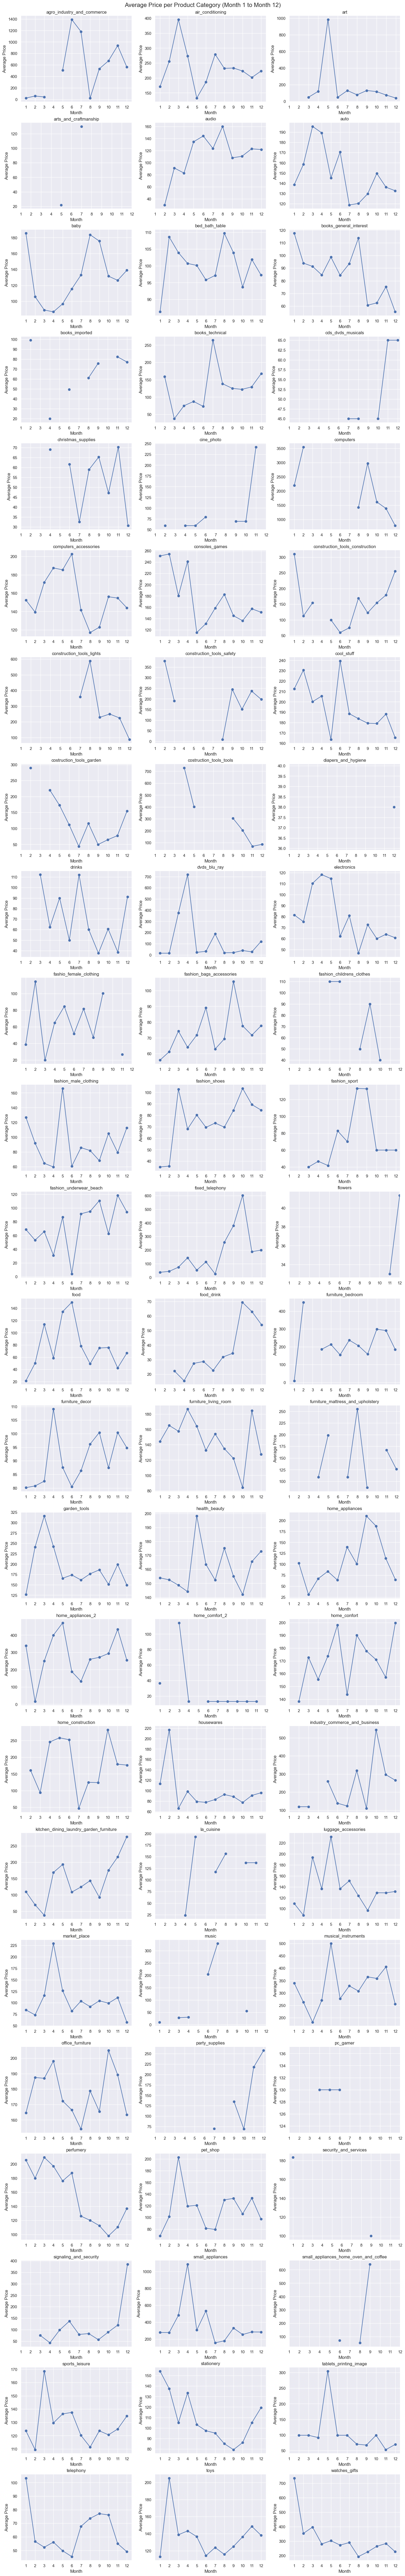

In [78]:
categories = product_avg_pivot.columns

n_categories = len(categories)
ncols = 3 
nrows = (n_categories // ncols)  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), constrained_layout=True)
axes = axes.flatten() 

for i, category in enumerate(categories):
    axes[i].plot(product_avg_pivot.index, product_avg_pivot[category], marker='o', label=category)
    axes[i].set_title(category)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Price')
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))  

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Average Price per Product Category (Month 1 to Month 12)', fontsize=16)
plt.show()

In [89]:
# Check the correlations between the product unit price and the product sales qty

sales_qty_table1 = orders17.groupby(['Month', 'product_category_name_english'])['product_order_size'].sum().reset_index()

merged_data = pd.merge(sales_qty_table1, product_avg, 
                       on=['Month', 'product_category_name_english'], 
                       how='inner')

correlations = merged_data['product_order_size'].corr(merged_data['Avg_Price'])
print(correlations)

-0.06019626778741483


### 2.3.2 2017 Customer Information

In [90]:
orders17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46314 entries, 0 to 46313
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       46314 non-null  object 
 1   customer_id                    46314 non-null  object 
 2   order_status                   46314 non-null  object 
 3   order_purchase_timestamp       46314 non-null  object 
 4   order_approved_at              46300 non-null  object 
 5   order_delivered_carrier_date   45681 non-null  object 
 6   order_delivered_customer_date  45140 non-null  object 
 7   order_estimated_delivery_date  46314 non-null  object 
 8   product_id                     46314 non-null  object 
 9   seller_id                      46314 non-null  object 
 10  shipping_limit_date            46314 non-null  object 
 11  price                          46314 non-null  float64
 12  freight_value                  46314 non-null 

In [97]:
orders17['order_purchase_timestamp'] = pd.to_datetime(orders17['order_purchase_timestamp'])
orders17['order_delivered_carrier_date'] = pd.to_datetime(orders17['order_delivered_carrier_date'])
orders17['order_delivered_customer_date'] = pd.to_datetime(orders17['order_delivered_customer_date'])
orders17['order_estimated_delivery_date'] = pd.to_datetime(orders17['order_estimated_delivery_date'])
orders17['shipping_limit_date'] = pd.to_datetime(orders17['shipping_limit_date'])

In [98]:
orders17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46314 entries, 0 to 46313
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       46314 non-null  object        
 1   customer_id                    46314 non-null  object        
 2   order_status                   46314 non-null  object        
 3   order_purchase_timestamp       46314 non-null  datetime64[ns]
 4   order_approved_at              46300 non-null  object        
 5   order_delivered_carrier_date   45681 non-null  datetime64[ns]
 6   order_delivered_customer_date  45140 non-null  datetime64[ns]
 7   order_estimated_delivery_date  46314 non-null  datetime64[ns]
 8   product_id                     46314 non-null  object        
 9   seller_id                      46314 non-null  object        
 10  shipping_limit_date            46314 non-null  datetime64[ns]
 11  price          

In [109]:
orders17['customer_id'].nunique()

44579

#### 2.3.2.1 2017 Sales by customer state

In [153]:
sales_by_state = orders17.groupby(['Month','customer_state'])['product_order_size'].sum().reset_index(name='sales qty')

pivot_table = pd.DataFrame(sales_by_state.pivot(index='customer_state', columns='Month', values='sales qty'))
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.sort_values('Total', ascending = False)

column_totals = pivot_table.sum(axis=0).rename('Total')
pivot_table = pivot_table.append(column_totals)
pivot_table.sort_values(by='Total', ascending=False, inplace=True)  # If you want to sort based on the 'Total' column

pivot_table

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_6556\592649530.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Month               1       2       3       4       5       6       7       8  \
customer_state                                                                  
Total           955.0  1951.0  3000.0  2684.0  4136.0  3583.0  4519.0  4910.0   
SP              364.0   706.0  1128.0  1018.0  1586.0  1470.0  1822.0  1966.0   
RJ              108.0   283.0   440.0   371.0   562.0   445.0   637.0   633.0   
MG              134.0   287.0   412.0   309.0   470.0   402.0   491.0   536.0   
RS               65.0   115.0   162.0   156.0   233.0   259.0   276.0   324.0   
PR               71.0   129.0   142.0   127.0   249.0   185.0   227.0   252.0   
SC               39.0    63.0   121.0   124.0   171.0   131.0   185.0   179.0   
BA               30.0    63.0   107.0   108.0   151.0   124.0   161.0   178.0   
GO               34.0    29.0    55.0    48.0    96.0    86.0    83.0   126.0   
ES               11.0    39.0    52.0    50.0   107.0    90.0    95.0   106.0   
DF               15.0    25.0    63.0    41.0    70.0    84.0    97.0    99.0   
PE                9.0    21.0    48.0    41.0    74.0    46.0    86.0    93.0   
CE                9.0    14.0    27.0    45.0    66.0    46.0    60.0    82.0   
PA               13.0    29.0    41.0    41.0    35.0    38.0    45.0    65.0   
MT               15.0    20.0    22.0    29.0    40.0    25.0    42.0    46.0   
MA                7.0    11.0    28.0    28.0    34.0    17.0    41.0    43.0   
MS                1.0    12.0    22.0    17.0    29.0    31.0    29.0    27.0   
PB                2.0    12.0    18.0    22.0    20.0    25.0    35.0    21.0   
RN                5.0    10.0    13.0    12.0    20.0    12.0    29.0    22.0   
PI                7.0    14.0    16.0    13.0    30.0    14.0    21.0    25.0   
AL                3.0    12.0    10.0    24.0    28.0    10.0    19.0    19.0   
SE                4.0    15.0    28.0    14.0    12.0    10.0    13.0    22.0   
RO                3.0    13.0    22.0     9.0     8.0    13.0    10.0    17.0   
TO                2.0     7.0     9.0    17.0    20.0     9.0     1.0    15.0   
AM                NaN     8.0     6.0    13.0     9.0     1.0     7.0     6.0   
AC                4.0     6.0     2.0     5.0     8.0     4.0     5.0     4.0   
AP                NaN     6.0     4.0     NaN     5.0     3.0     1.0     4.0   
RR                NaN     2.0     2.0     2.0     3.0     3.0     1.0     NaN   

Month                9      10      11      12    Total  
customer_state                                           
Total           4831.0  5322.0  8665.0  6308.0  50864.0  
SP              1817.0  2084.0  3437.0  2646.0  20044.0  
RJ               700.0   768.0  1212.0   870.0   7029.0  
MG               568.0   640.0  1089.0   786.0   6124.0  
RS               317.0   300.0   482.0   316.0   3005.0  
PR               207.0   243.0   446.0   284.0   2562.0  
SC               174.0   189.0   354.0   205.0   1935.0  
BA               191.0   188.0   297.0   211.0   1809.0  
GO               104.0   130.0   183.0   138.0   1112.0  
ES               106.0   108.0   195.0   115.0   1074.0  
DF               113.0   109.0   182.0   153.0   1051.0  
PE                88.0    85.0   148.0   118.0    857.0  
CE                94.0    71.0   123.0    85.0    722.0  
PA                46.0    59.0    78.0    61.0    551.0  
MT                45.0    63.0    88.0    54.0    489.0  
MA                46.0    57.0    63.0    45.0    420.0  
MS                33.0    45.0    54.0    40.0    340.0  
PB                34.0    31.0    30.0    41.0    291.0  
RN                28.0    26.0    49.0    33.0    259.0  
PI                24.0    26.0    32.0    25.0    247.0  
AL                20.0    33.0    33.0    12.0    223.0  
SE                17.0    23.0    28.0    27.0    213.0  
RO                20.0    15.0    18.0    12.0    160.0  
TO                19.0    14.0    22.0    15.0    150.0  
AM                10.0     3.0    10.0     6.0     79.0  
AC 

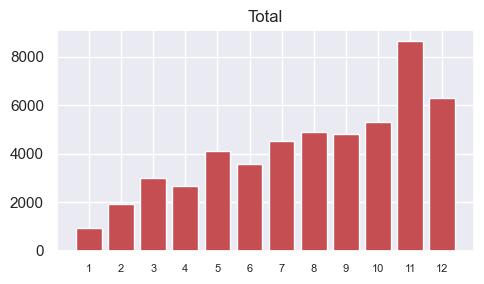

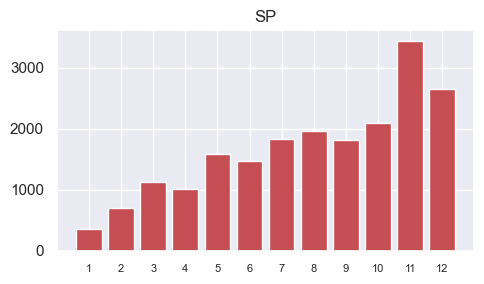

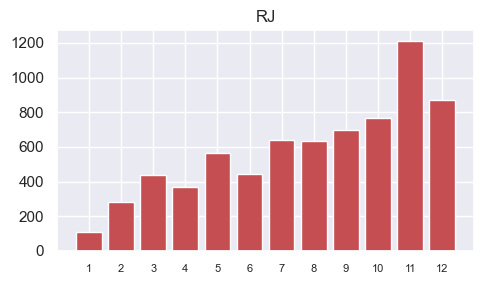

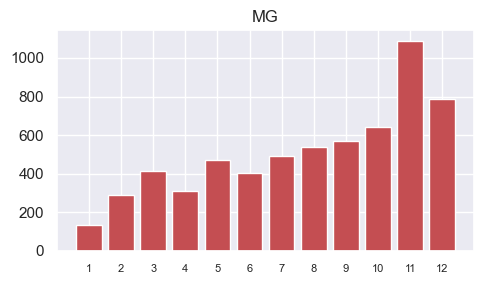

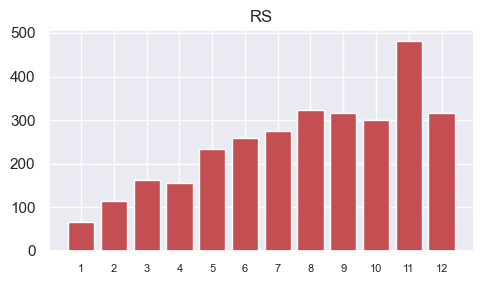

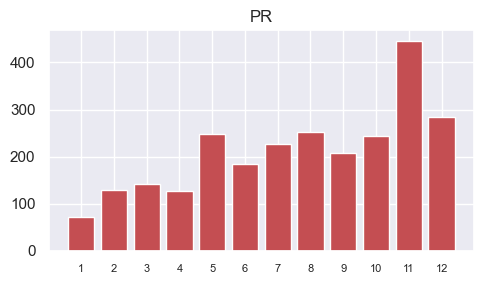

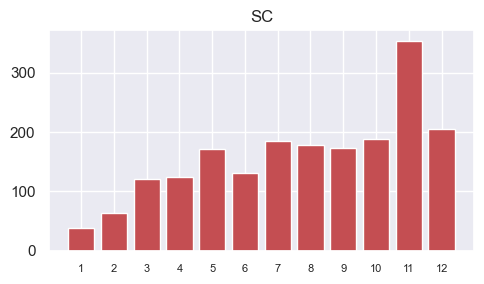

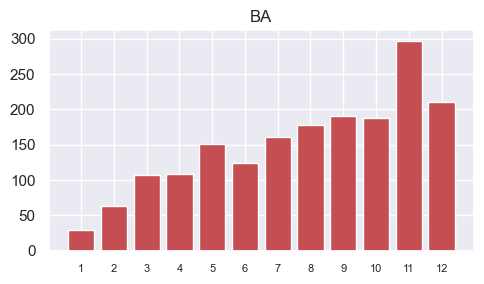

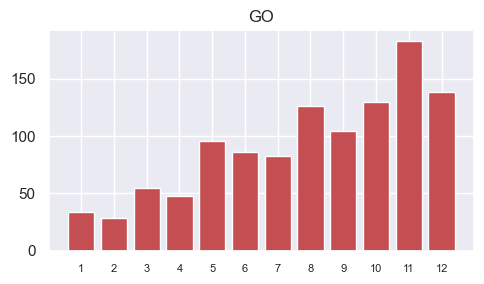

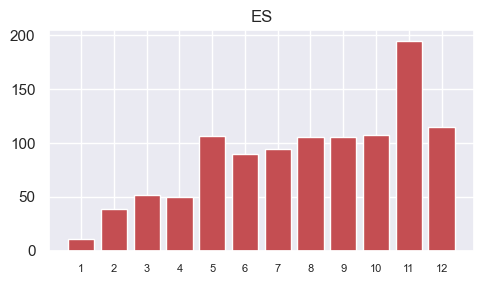

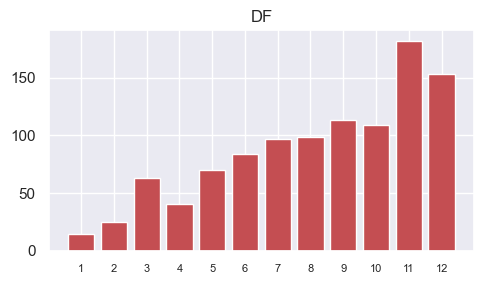

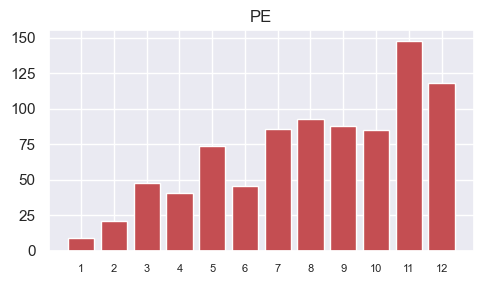

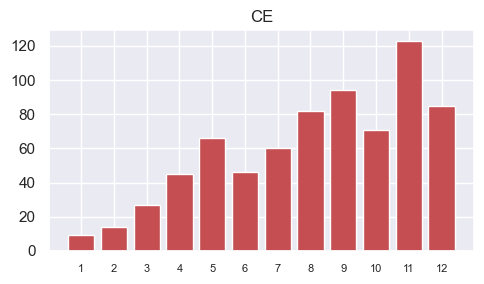

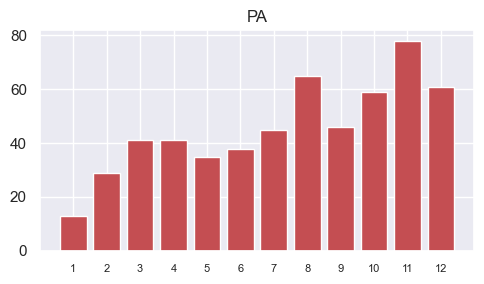

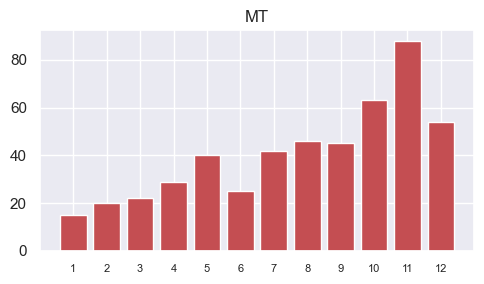

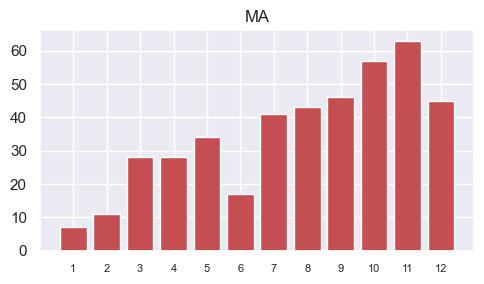

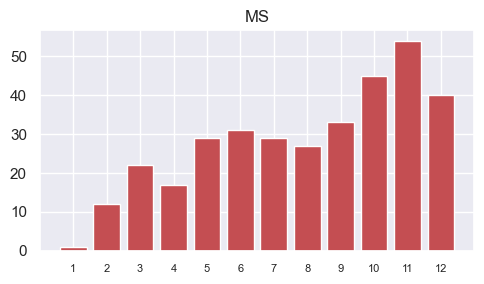

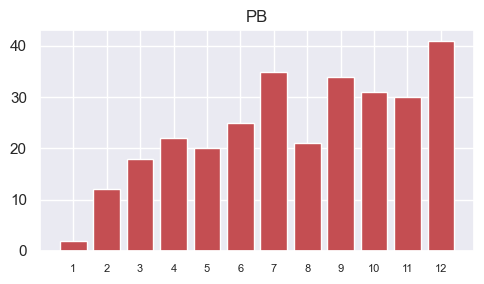

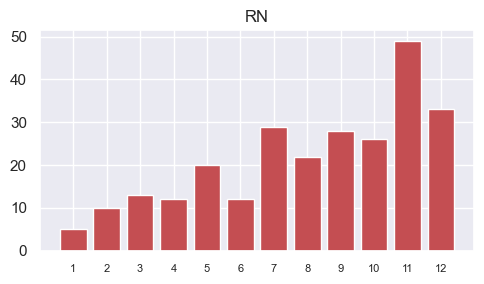

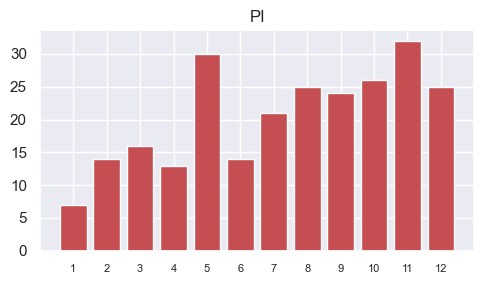

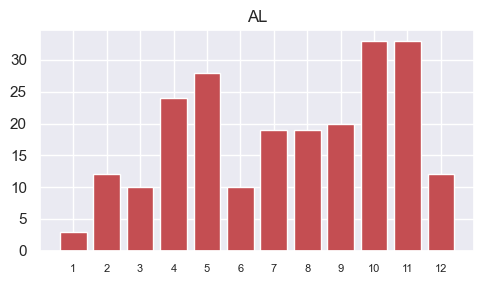

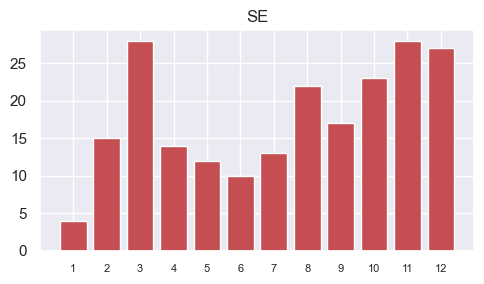

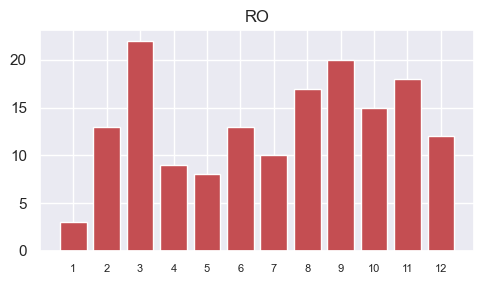

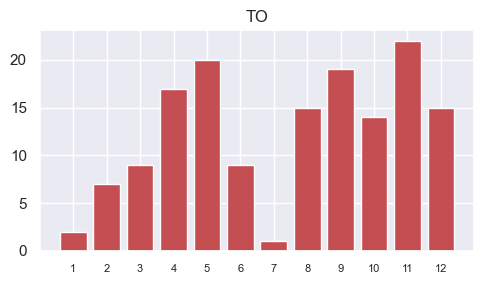

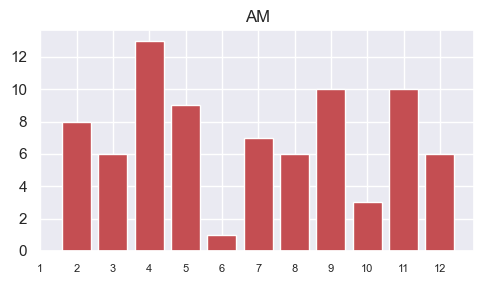

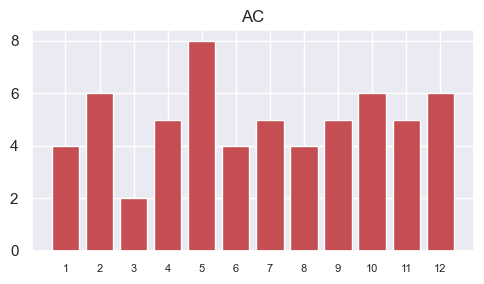

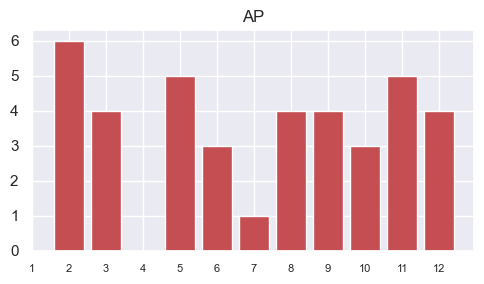

In [154]:
for i in range(1,len(pivot_table)):
    x_values = pivot_table[i-1:i].drop(columns=['Total']).columns
    y_values = pivot_table.iloc[i-1, :-1].values.tolist()
    
    fig, ax = plt.subplots(figsize=(5, 3)) 
    ax.bar(x_values, y_values, color='r')
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, size=8)
    ax.set(title=pivot_table.index[i-1])
    
    plt.tight_layout()
    plt.show()

#### 2.3.2.2 2017 Sales by customer city

In [155]:
sales_by_state_city = orders17.groupby(['customer_state', 'customer_city','Month'])['product_order_size'].sum().reset_index(name='sales_qty')

# Creating pivot table
pivot_table = pd.DataFrame(sales_by_state_city.pivot(index=['customer_state', 'customer_city'], columns='Month', values='sales_qty'))

# Calculating the total counts for each state
pivot_table['Total'] = pivot_table.sum(axis=1)

column_totals = pivot_table.sum(axis=0).rename('Total')
pivot_table = pivot_table.append(column_totals)
pivot_table.sort_values(by='Total', ascending=False, inplace=True)  # If you want to sort based on the 'Total' column


# Displaying the pivot table with totals
pivot_table.sort_values('Total', ascending = False)

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_6556\21199991.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Month                            1       2       3       4       5       6  \
Total                        955.0  1951.0  3000.0  2684.0  4136.0  3583.0   
(SP, sao paulo)              119.0   248.0   433.0   329.0   596.0   521.0   
(RJ, rio de janeiro)          54.0   151.0   248.0   196.0   323.0   233.0   
(MG, belo horizonte)          18.0    44.0   123.0    73.0    90.0    82.0   
(DF, brasilia)                15.0    25.0    60.0    41.0    70.0    81.0   
...                            ...     ...     ...     ...     ...     ...   
(PB, fagundes)                 NaN     NaN     1.0     NaN     NaN     NaN   
(BA, palmeiras)                NaN     1.0     NaN     NaN     NaN     NaN   
(BA, pindai)                   NaN     NaN     NaN     NaN     NaN     NaN   
(BA, cordeiros)                NaN     NaN     1.0     NaN     NaN     NaN   
(RS, lagoa dos tres cantos)    NaN     NaN     NaN     NaN     NaN     NaN   

Month                             7       8       9      10      11      12  \
Total                        4519.0  4910.0  4831.0  5322.0  8665.0  6308.0   
(SP, sao paulo)               636.0   732.0   686.0   735.0  1290.0   953.0   
(RJ, rio de janeiro)          356.0   358.0   352.0   416.0   673.0   453.0   
(MG, belo horizonte)          105.0   118.0   109.0   150.0   253.0   210.0   
(DF, brasilia)                 90.0    98.0   113.0   109.0   182.0   153.0   
...                             ...     ...     ...     ...     ...     ...   
(PB, fagundes)                  NaN     NaN     NaN     NaN     NaN     NaN   
(BA, palmeiras)                 NaN     NaN     NaN     NaN     NaN     NaN   
(BA, pindai)                    NaN     NaN     1.0     NaN     NaN     NaN   
(BA, cordeiros)                 NaN     NaN     NaN     NaN     NaN     NaN   
(RS, lagoa dos tres cantos)     NaN     NaN     NaN     NaN     NaN     1.0   

Month                          Total  
Total                        50864.0  
(SP, sao paulo)               7278.0  
(RJ, rio de janeiro)          3813.0  
(MG, belo horizonte)          1375.0  
(DF, brasilia)                1037.0  
...                              ...  
(PB, fagundes)                   1.0  
(BA, palmeiras)                  1.0  
(BA, pindai)                     1.0  
(BA, cordeiros)                  1.0  
(RS, lagoa dos tres cantos)      1.0  

[3390 rows x 13 columns]

#### 2.3.2.2.1 2017 Sales by customer city

In [126]:
geo = pd.read_csv(r"C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_geolocation_dataset.csv")

In [127]:
geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [129]:
geo.columns = ['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

In [131]:
orders17_geo = orders17.merge(geo, how= 'inner', on = 'customer_zip_code_prefix')

In [135]:
orders17_geo.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered               2017-10-02  2017-10-02 11:07:15   
1    delivered               2017-10-02  2017-10-02 11:07:15   
2    delivered               2017-10-02  2017-10-02 11:07:15   
3    delivered               2017-10-02  2017-10-02 11:07:15   
4    delivered               2017-10-02  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-10-04 19:55:00           2017-10-10 21:25:13   
4          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date                        product_id  \
0                    2017-10-18  87285b34884572647811a353c7ac498a   
1                    2017-10-18  87285b34884572647811a353c7ac498a   
2                    2017-10-18  87285b34884572647811a353c7ac498a   
3                    2017-10-18  87285b34884572647811a353c7ac498a   
4                    2017-10-18  87285b34884572647811a353c7ac498a   

                          seller_id  ... order_size  product_order_size  Year  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  ...          1                 1.0  2017   
1  3504c0cb71d7fa48d967e0e4c94d59d9  ...          1                 1.0  2017   
2  3504c0cb71d7fa48d967e0e4c94d59d9  ...          1                 1.0  2017   
3  3504c0cb71d7fa48d967e0e4c94d59d9  ...          1                 1.0  2017   
4  3504c0cb71d7fa48d967e0e4c94d59d9  ...          1                 1.0  2017   

  Month  product_sales_amt order_sales_amt geolocation_lat  geolocation_lng  \
0    10              29.99           29.99      -23.574809       -46.587471   
1    10              29.99           29.99      -23.578333       -46.587123   
2    10              29.99           29.99      -23.574809       -46.587471   
3    10              29.99           29.99      -23.575033       -46.587451   
4    10              29.99           29.99      -23.580054       -46.586673   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  

[5 rows x 31 columns]

In [137]:
orders17_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071341 entries, 0 to 7071340
Data columns (total 31 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              object        
 5   order_delivered_carrier_date   datetime64[ns]
 6   order_delivered_customer_date  datetime64[ns]
 7   order_estimated_delivery_date  datetime64[ns]
 8   product_id                     object        
 9   seller_id                      object        
 10  shipping_limit_date            datetime64[ns]
 11  price                          float64       
 12  freight_value                  float64       
 13  customer_unique_id             object        
 14  customer_zip_code_prefix       int64         
 15  customer_city  

### 2.3.3 2017 Seller Information

In [156]:
orders17['seller_id'].nunique()

1784

In [168]:
sellers_ct = orders17.groupby(['Month','product_category_name_english'])['seller_id'].nunique().reset_index()

pivot_table = pd.DataFrame(sellers_ct.pivot(index='product_category_name_english', columns='Month', values='seller_id'))
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.sort_values('Total', ascending = False)

column_totals = pivot_table.sum(axis=0).rename('Total')
pivot_table = pivot_table.append(column_totals)
pivot_table.sort_values(by='Total', ascending=False, inplace=True)  # If you want to sort based on the 'Total' column

pivot_table 

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_6556\3959508988.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Month                              1      2      3      4      5      6  \
product_category_name_english                                             
Total                          310.0  586.0  715.0  724.0  855.0  774.0   
sports_leisure                  24.0   58.0   62.0   74.0   81.0   73.0   
furniture_decor                 45.0   74.0   74.0   67.0   67.0   58.0   
health_beauty                   26.0   46.0   50.0   49.0   61.0   56.0   
housewares                      16.0   33.0   46.0   51.0   61.0   60.0   
...                              ...    ...    ...    ...    ...    ...   
flowers                          NaN    NaN    NaN    NaN    NaN    NaN   
pc_gamer                         NaN    NaN    NaN    1.0    1.0    1.0   
security_and_services            1.0    NaN    NaN    NaN    NaN    NaN   
arts_and_craftmanship            NaN    NaN    NaN    NaN    1.0    NaN   
diapers_and_hygiene              NaN    NaN    NaN    NaN    NaN    NaN   

Month                              7       8       9      10      11      12  \
product_category_name_english                                                  
Total                          906.0  1063.0  1082.0  1120.0  1458.0  1246.0   
sports_leisure                  86.0   105.0   107.0   109.0   135.0   127.0   
furniture_decor                 65.0    80.0    77.0    81.0   108.0    84.0   
health_beauty                   66.0    78.0    89.0    84.0   114.0    94.0   
housewares                      65.0    82.0    75.0    74.0    97.0    83.0   
...                              ...     ...     ...     ...     ...     ...   
flowers                          NaN     NaN     NaN     NaN     2.0     2.0   
pc_gamer                         NaN     NaN     NaN     NaN     NaN     NaN   
security_and_services            NaN     NaN     1.0     NaN     NaN     NaN   
arts_and_craftmanship            1.0     NaN     NaN     NaN     NaN     NaN   
diapers_and_hygiene              NaN     NaN     NaN     NaN     NaN     1.0   

Month                            Total  
product_category_name_english           
Total                          10839.0  
sports_leisure                  1041.0  
furniture_decor                  880.0  
health_beauty                    813.0  
housewares                       743.0  
...                                ...  
flowers                            4.0  
pc_gamer                           3.0  
security_and_services              2.0  
arts_and_craftmanship              2.0  
diapers_and_hygiene                1.0  

[73 rows x 13 columns]

In [169]:
sellers_state = orders17.groupby(['Month','seller_state'])['seller_id'].nunique().reset_index()

pivot_table = pd.DataFrame(sellers_state.pivot(index='seller_state', columns='Month', values='seller_id'))
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.sort_values('Total', ascending = False)

column_totals = pivot_table.sum(axis=0).rename('Total')
pivot_table = pivot_table.append(column_totals)
pivot_table.sort_values(by='Total', ascending=False, inplace=True)  # If you want to sort based on the 'Total' column

pivot_table 

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_6556\348426702.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Month             1      2      3      4      5      6      7      8      9  \
seller_state                                                                  
Total         227.0  427.0  499.0  506.0  583.0  539.0  606.0  708.0  731.0   
SP            127.0  264.0  300.0  292.0  341.0  323.0  375.0  420.0  451.0   
PR             33.0   46.0   61.0   60.0   71.0   64.0   59.0   78.0   74.0   
MG             27.0   45.0   55.0   59.0   66.0   55.0   63.0   70.0   78.0   
SC             13.0   27.0   29.0   33.0   37.0   31.0   35.0   47.0   42.0   
RJ              8.0   15.0   17.0   24.0   25.0   26.0   25.0   40.0   29.0   
RS              8.0   12.0   18.0   19.0   18.0   19.0   23.0   21.0   19.0   
DF              2.0    4.0    5.0    6.0    5.0    6.0    8.0   11.0   11.0   
GO              1.0    1.0    3.0    3.0    5.0    5.0    7.0    8.0    9.0   
BA              2.0    3.0    2.0    2.0    4.0    4.0    2.0    3.0    6.0   
ES              2.0    3.0    2.0    2.0    1.0    1.0    1.0    2.0    1.0   
CE              1.0    3.0    2.0    2.0    2.0    1.0    2.0    3.0    3.0   
PE              1.0    1.0    2.0    NaN    1.0    1.0    1.0    1.0    3.0   
RN              NaN    NaN    NaN    2.0    1.0    2.0    NaN    2.0    2.0   
MT              NaN    NaN    NaN    NaN    1.0    NaN    2.0    1.0    1.0   
PB              NaN    1.0    1.0    NaN    1.0    1.0    1.0    NaN    1.0   
MS              1.0    1.0    1.0    1.0    2.0    NaN    NaN    NaN    NaN   
RO              NaN    NaN    NaN    1.0    1.0    NaN    2.0    1.0    NaN   
SE              1.0    NaN    NaN    NaN    1.0    NaN    NaN    NaN    NaN   
PA              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    1.0   
AM              NaN    1.0    1.0    NaN    NaN    NaN    NaN    NaN    NaN   

Month            10     11     12   Total  
seller_state                               
Total         776.0  965.0  861.0  7428.0  
SP            481.0  580.0  533.0  4487.0  
PR             85.0  110.0   93.0   834.0  
MG             80.0   92.0   79.0   769.0  
SC             43.0   56.0   45.0   438.0  
RJ             27.0   50.0   42.0   328.0  
RS             25.0   30.0   27.0   239.0  
DF             12.0   16.0   14.0   100.0  
GO              8.0    8.0    7.0    65.0  
BA              6.0    4.0    7.0    45.0  
ES              3.0    3.0    4.0    25.0  
CE              1.0    1.0    1.0    22.0  
PE              1.0    4.0    1.0    17.0  
RN              NaN    2.0    3.0    14.0  
MT              3.0    3.0    2.0    13.0  
PB              NaN    1.0    1.0     8.0  
MS              1.0    1.0    NaN     8.0  
RO              NaN    1.0    1.0     7.0  
SE              NaN    2.0    NaN     4.0  
PA              NaN    1.0    1.0     3.0  
AM              NaN    NaN    NaN     2.0